Name: Anik Chakraborty (waytoanik@outlook.com)

Business Objective:

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study. In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
warnings.filterwarnings("ignore")

## 1. Importing Data

In [4]:
app_df= pd.read_csv('application_data.csv')

## 2. Checking Dataset - Variables, Structure

In [5]:
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [6]:
#Checking shape of the dataframe

app_df.shape

(307511, 122)

In [7]:
app_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [8]:
#Describing dataframe

app_df.describe().T

count           mean            std  \
SK_ID_CURR                    307511.0  278180.518577  102790.175348   
TARGET                        307511.0       0.080729       0.272419   
CNT_CHILDREN                  307511.0       0.417052       0.722121   
AMT_INCOME_TOTAL              307511.0  168797.919297  237123.146279   
AMT_CREDIT                    307511.0  599025.999706  402490.776996   
AMT_ANNUITY                   307499.0   27108.573909   14493.737315   
AMT_GOODS_PRICE               307233.0  538396.207429  369446.460540   
REGION_POPULATION_RELATIVE    307511.0       0.020868       0.013831   
DAYS_BIRTH                    307511.0  -16036.995067    4363.988632   
DAYS_EMPLOYED                 307511.0   63815.045904  141275.766519   
DAYS_REGISTRATION             307511.0   -4986.120328    3522.886321   
DAYS_ID_PUBLISH               307511.0   -2994.202373    1509.450419   
OWN_CAR_AGE                   104582.0      12.061091      11.944812   
FLAG_MOBIL                    307511.0       0.999997       0.001803   
FLAG_EMP_PHONE                307511.0       0.819889       0.384280   
FLAG_WORK_PHONE               307511.0       0.199368       0.399526   
FLAG_CONT_MOBILE              307511.0       0.998133       0.043164   
FLAG_PHONE                    307511.0       0.281066       0.449521   
FLAG_EMAIL                    307511.0       0.056720       0.231307   
CNT_FAM_MEMBERS               307509.0       2.152665       0.910682   
REGION_RATING_CLIENT          307511.0       2.052463       0.509034   
REGION_RATING_CLIENT_W_CITY   307511.0       2.031521       0.502737   
HOUR_APPR_PROCESS_START       307511.0      12.063419       3.265832   
REG_REGION_NOT_LIVE_REGION    307511.0       0.015144       0.122126   
REG_REGION_NOT_WORK_REGION    307511.0       0.050769       0.219526   
LIVE_REGION_NOT_WORK_REGION   307511.0       0.040659       0.197499   
REG_CITY_NOT_LIVE_CITY        307511.0       0.078173       0.268444   
REG_CITY_NOT_WORK_CITY        307511.0       0.230454       0.421124   
LIVE_CITY_NOT_WORK_CITY       307511.0       0.179555       0.383817   
EXT_SOURCE_1                  134133.0       0.502130       0.211062   
EXT_SOURCE_2                  306851.0       0.514393       0.191060   
EXT_SOURCE_3                  246546.0       0.510853       0.194844   
APARTMENTS_AVG                151450.0       0.117440       0.108240   
BASEMENTAREA_AVG              127568.0       0.088442       0.082438   
YEARS_BEGINEXPLUATATION_AVG   157504.0       0.977735       0.059223   
YEARS_BUILD_AVG               103023.0       0.752471       0.113280   
COMMONAREA_AVG                 92646.0       0.044621       0.076036   
ELEVATORS_AVG                 143620.0       0.078942       0.134576   
ENTRANCES_AVG                 152683.0       0.149725       0.100049   
FLOORSMAX_AVG                 154491.0       0.226282       0.144641   
FLOORSMIN_AVG                  98869.0       0.231894       0.161380   
LANDAREA_AVG                  124921.0       0.066333       0.081184   
LIVINGAPARTMENTS_AVG           97312.0       0.100775       0.092576   
LIVINGAREA_AVG                153161.0       0.107399       0.110565   
NONLIVINGAPARTMENTS_AVG        93997.0       0.008809       0.047732   
NONLIVINGAREA_AVG             137829.0       0.028358       0.069523   
APARTMENTS_MODE               151450.0       0.114231       0.107936   
BASEMENTAREA_MODE             127568.0       0.087543       0.084307   
YEARS_BEGINEXPLUATATION_MODE  157504.0       0.977065       0.064575   
YEARS_BUILD_MODE              103023.0       0.759637       0.110111   
COMMONAREA_MODE                92646.0       0.042553       0.074445   
ELEVATORS_MODE                143620.0       0.074490       0.132256   
ENTRANCES_MODE                152683.0       0.145193       0.100977   
FLOORSMAX_MODE                154491.0       0.222315       0.143709   
FLOORSMIN_MODE                 98869.0       0.228058       0.161160   
L

## 3. Data Quality Check, Missing Values and Outliers

In [9]:
# Finding Percentage of missing value for all columns:

missing_per= (app_df.isna().sum()*100/app_df.shape[0])
missing_per.sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [10]:
## Removing Columns having more than 50% Missing Values

app_df_new= app_df[(missing_per[missing_per < 50]).index]
app_df_new.shape

(307511, 81)

After droping colums that have missing values more than 50%, we have now 81 columns in our application dataset. 

#### Checking columns having data types object:

In [11]:
app_df_new.select_dtypes(include='O').head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0  House / apartment        Laborers                  WEDNESDAY   
1  House / apartment      Core staff                     MONDAY   
2  House / apartment        Laborers                     MONDAY   
3  House / apartment        Laborers                  WEDNESDAY   
4  House / apartment      Core staff                   THURSDAY   

        ORGANIZATION_TYPE EMERGENCYSTATE_MODE  
0  Business Entity Type 3                  No  
1                  School                  No  
2              Government                 NaN  
3  Business Entity Type 3                 NaN  
4                Religion                 NaN

#### Checking columns having data types other than object:

In [12]:
app_df_new.select_dtypes(exclude='O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 68 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   CNT_CHILDREN                  307511 non-null  int64  
 3   AMT_INCOME_TOTAL              307511 non-null  float64
 4   AMT_CREDIT                    307511 non-null  float64
 5   AMT_ANNUITY                   307499 non-null  float64
 6   AMT_GOODS_PRICE               307233 non-null  float64
 7   REGION_POPULATION_RELATIVE    307511 non-null  float64
 8   DAYS_BIRTH                    307511 non-null  int64  
 9   DAYS_EMPLOYED                 307511 non-null  int64  
 10  DAYS_REGISTRATION             307511 non-null  float64
 11  DAYS_ID_PUBLISH               307511 non-null  int64  
 12  FLAG_MOBIL                    307511 non-nul

In [13]:
app_df_new.select_dtypes(exclude='O').head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801       -9461   
1      35698.5        1129500.0                    0.003541      -16765   
2       6750.0         135000.0                    0.010032      -19046   
3      29686.5         297000.0                    0.008019      -19005   
4      21865.5         513000.0                    0.028663      -19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0           -637            -3648.0            -2120           1   
1          -1188            -1186.0             -291           1   
2           -225            -4260.0            -2531           1   
3          -3039            -9833.0            -2437           1   
4          -3038            -4311.0            -3458           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
0      0.262949      0.139376                       0.9722         0.0833   
1      0.622246           NaN                       0.9851         0.2917   
2      0.555912      0.729567                          NaN            NaN   
3      0.650442           NaN                          NaN            NaN   
4      0.322738           NaN                          NaN            NaN   

   YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  \
0                        0.9722          0.0833                        0.

It can be seen for DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE days values are in negative we will change these values to positive.

In [14]:
neg_days= ['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']

for i in neg_days:
    app_df_new[i]= app_df_new[i].apply(lambda x: abs(x))
    
app_df_new[neg_days].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637             3648.0             2120   
1       16765           1188             1186.0              291   
2       19046            225             4260.0             2531   
3       19005           3039             9833.0             2437   
4       19932           3038             4311.0             3458   

   DAYS_LAST_PHONE_CHANGE  
0                  1134.0  
1                   828.0  
2                   815.0  
3                   617.0  
4                  1106.0

Checking columns having data type float64:

In [15]:
app_df_new.select_dtypes(include='float64').head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          202500.0    406597.5      24700.5         351000.0   
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  CNT_FAM_MEMBERS  \
0                    0.018801             3648.0              1.0   
1                    0.003541             1186.0              2.0   
2                    0.010032             4260.0              1.0   
3                    0.008019             9833.0              2.0   
4                    0.028663             4311.0              1.0   

   EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
0      0.262949      0.139376                       0.9722         0.0833   
1      0.622246           NaN                       0.9851         0.2917   
2      0.555912      0.729567                          NaN            NaN   
3      0.650442           NaN                          NaN            NaN   
4      0.322738           NaN                          NaN            NaN   

   YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  \
0                        0.9722          0.0833                        0.9722   
1                        0.9851          0.2917                        0.9851   
2                           NaN             NaN                           NaN   
3                           NaN             NaN                           NaN   
4                           NaN             NaN                           NaN   

   FLOORSMAX_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
0          0.0833          0.0149                       2.0   
1          0.2917          0.0714                       1.0   
2             NaN             NaN                       0.0   
3             NaN             NaN                       2.0   
4             NaN             NaN                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                  1134.0   
1                       0.0                   828.0   
2                       0.0                   815.0   
3                       0.0                   617.0   
4                       0.0                  1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0

Below columns denotes Number of enquires, count of famuily memebers, No. of social media connects and No. of days. So these columns can not be in float, so we'll convert these into integer:
1. AMT_REQ_CREDIT_BUREAU_HOUR
2. AMT_REQ_CREDIT_BUREAU_DAY
3. AMT_REQ_CREDIT_BUREAU_WEEK
4. AMT_REQ_CREDIT_BUREAU_MON
5. AMT_REQ_CREDIT_BUREAU_QRT
6. AMT_REQ_CREDIT_BUREAU_YEAR
7. CNT_FAM_MEMBERS
8. OBS_30_CNT_SOCIAL_CIRCLE
9. DEF_30_CNT_SOCIAL_CIRCLE
10. OBS_60_CNT_SOCIAL_CIRCLE
11. DEF_60_CNT_SOCIAL_CIRCLE
12. DAYS_REGISTRATION
13. DAYS_LAST_PHONE_CHANGE

In [16]:
col_int= ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
          'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE',
          'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_REGISTRATION',
          'DAYS_LAST_PHONE_CHANGE']

for col in col_int:
    app_df_new[col]= app_df_new[col].astype('Int64', errors='ignore')

In [17]:
app_df_new[col_int].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  Int64  
 1   AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  Int64  
 2   AMT_REQ_CREDIT_BUREAU_WEEK  265992 non-null  Int64  
 3   AMT_REQ_CREDIT_BUREAU_MON   265992 non-null  Int64  
 4   AMT_REQ_CREDIT_BUREAU_QRT   265992 non-null  Int64  
 5   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  Int64  
 6   CNT_FAM_MEMBERS             307509 non-null  Int64  
 7   OBS_30_CNT_SOCIAL_CIRCLE    306490 non-null  Int64  
 8   DEF_30_CNT_SOCIAL_CIRCLE    306490 non-null  Int64  
 9   OBS_60_CNT_SOCIAL_CIRCLE    306490 non-null  Int64  
 10  DEF_60_CNT_SOCIAL_CIRCLE    306490 non-null  Int64  
 11  DAYS_REGISTRATION           307511 non-null  float64
 12  DAYS_LAST_PHONE_CHANGE      307510 non-null  Int64  
dtypes: Int64(12), 

#### Checking Integar Columns having categorical data:

There are few columns having integer types but actually contains categorical data. As here we are not building any ML model and out intention is to perform EDA, converting these columns into data type object is required to perform  univariate and bivariate analysis properly. We will check columns having unique values 3 or less and will convert those columns into object type.

In [18]:
nunique_cols= app_df_new.select_dtypes('int64').nunique().sort_values()
nunique_cols

REG_CITY_NOT_LIVE_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_21                    2
FLAG_DOCUMENT_15                    2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_11                    2
REG_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_13                    2
REG_REGION_NOT_WORK_REGION          2
TARGET                              2
FLAG_DOCUMENT_20                    2
FLAG_DOCUMENT_19                    2
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
LIVE_REGION_

In [19]:
#Creating list of the columns that have maximum of 3 unique values

col_list= nunique_cols[nunique_cols<=3].index.tolist()


#Converting these columns from type int64 to object

for c in col_list:
    app_df_new[c]= app_df_new[c].astype("object")

    
app_df_new[col_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   REG_CITY_NOT_LIVE_CITY       307511 non-null  object
 1   LIVE_CITY_NOT_WORK_CITY      307511 non-null  object
 2   FLAG_DOCUMENT_16             307511 non-null  object
 3   FLAG_DOCUMENT_21             307511 non-null  object
 4   FLAG_DOCUMENT_15             307511 non-null  object
 5   FLAG_DOCUMENT_14             307511 non-null  object
 6   FLAG_DOCUMENT_2              307511 non-null  object
 7   FLAG_DOCUMENT_3              307511 non-null  object
 8   FLAG_DOCUMENT_4              307511 non-null  object
 9   FLAG_DOCUMENT_5              307511 non-null  object
 10  FLAG_DOCUMENT_6              307511 non-null  object
 11  FLAG_DOCUMENT_7              307511 non-null  object
 12  FLAG_DOCUMENT_8              307511 non-null  object
 13  FLAG_DOCUMENT_

### Analyzing Columns having less than 14% Missing Value:

Columns having Missing Values more than 0% but less than 14%:

In [20]:
#Count of missing values in columns that have > 0 %  and  < 14% missing value

app_df_new[(missing_per[(missing_per < 14) & (missing_per > 0)]).index].isnull().sum()

AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
CNT_FAM_MEMBERS                   2
EXT_SOURCE_2                    660
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [21]:
app_df_new[(missing_per[(missing_per <= 13) & (missing_per > 0)]).index]

AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  CNT_FAM_MEMBERS  \
0           24700.5         351000.0   Unaccompanied                1   
1           35698.5        1129500.0          Family                2   
2            6750.0         135000.0   Unaccompanied                1   
3           29686.5         297000.0   Unaccompanied                2   
4           21865.5         513000.0   Unaccompanied                1   
...             ...              ...             ...              ...   
307506      27558.0         225000.0   Unaccompanied                1   
307507      12001.5         225000.0   Unaccompanied                1   
307508      29979.0         585000.0   Unaccompanied                1   
307509      20205.0         319500.0   Unaccompanied                2   
307510      49117.5         675000.0   Unaccompanied                2   

        EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0           0.262949                         2                         2   
1           0.622246                         1                         0   
2           0.555912                         0                         0   
3           0.650442                         2                         0   
4           0.322738                         0                         0   
...              ...                       ...                       ...   
307506      0.681632                         0                         0   
307507      0.115992                         0                         0   
307508      0.535722                         6                         0   
307509      0.514163                         0                         0   
307510      0.708569                         0                         0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                              2                         2   
1                              1                         0   
2                              0                         0   
3                              2                         0   
4                              0                         0   
...                          ...                       ...   
307506                         0                         0   
307507                         0                         0   
307508                         6                         0   
307509                         0                         0   
307510                         0                         0   

        DAYS_LAST_PHONE_CHANGE  
0                         1134  
1                          828  
2                          815  
3                          617  
4                         1106  
...                        ...  
307506                     273  
307507                       0  
307508                    1909  
307509                     322  
307510                     787  

[307511 rows x 10 columns]

In [22]:
#What are the values of NAME_FAMILY_STATUS where CNT_FAM_MEMBERS is NA?

app_df_new.loc[app_df_new['CNT_FAM_MEMBERS'].isnull(),['NAME_FAMILY_STATUS','CNT_FAM_MEMBERS']]

NAME_FAMILY_STATUS  CNT_FAM_MEMBERS
41982             Unknown             <NA>
187348            Unknown             <NA>

In [23]:
# How many 'Unknow' values are there in NAME_FAMILY_STATUS column?

app_df_new.loc[app_df_new['NAME_FAMILY_STATUS']=='Unknown',['NAME_FAMILY_STATUS','CNT_FAM_MEMBERS']]

NAME_FAMILY_STATUS  CNT_FAM_MEMBERS
41982             Unknown             <NA>
187348            Unknown             <NA>

In [24]:
# Observations of client's social surroundings are NA for all same clients?

app_df_new.loc[app_df_new.OBS_30_CNT_SOCIAL_CIRCLE.isna(),['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']]

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
68                          <NA>                      <NA>   
394                         <NA>                      <NA>   
397                         <NA>                      <NA>   
457                         <NA>                      <NA>   
1042                        <NA>                      <NA>   
...                          ...                       ...   
305526                      <NA>                      <NA>   
305623                      <NA>                      <NA>   
305641                      <NA>                      <NA>   
305642                      <NA>                      <NA>   
307402                      <NA>                      <NA>   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
68                          <NA>                      <NA>  
394                         <NA>                      <NA>  
397                         <NA>                      <NA>  
457                         <NA>                      <NA>  
1042                        <NA>                      <NA>  
...                          ...                       ...  
305526                      <NA>                      <NA>  
305623                      <NA>                      <NA>  
305641                      <NA>                      <NA>  
305642                      <NA>                      <NA>  
307402                      <NA>                      <NA>  

[1021 rows x 4 columns]

### Suggesting Missing Value treatment:

As We are performing EDA only and we are not going to build any model, so here it's not necessary to treat missing values. So we are just suggesting the missing value traetment approaches based on above analysis and not actually replacing the missing values.

1. AMT_ANNUITY has continuous value and it's distribution is not symmetrical, we can use Median imputation to treat missing values in this column.
2. AMT_GOODS_PRICE has continuous value and it's distribution is not symmetrical, we can use Median imputation to treat missing values in this column.
3. NAME_TYPE_SUITE is a categorical column, we can use mode to impute the missing values.
4. CNT_FAM_MEMBERS and NAME_FAMILY_STATUS: Both of these Columns have 2 missing values, In NAME_FAMILY_STATUS column the missing value is mentioned as 'Unknow' and in CNT_FAM_MEMBERS columns these are NA values. We can replace these with mode of those two columns.
5. EXT_SOURCE_2 : it's a continuous variable, we can replace missing values using Median imputation.
6. OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE: We can use mode imputation for these columns.
7. DAYS_LAST_PHONE_CHANGE: There is a single missing value, we can use median imputation here.
8. AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT: All these columns denotes Number of enquiries to Credit Bureau about the client # Months/Days/Weeks before application. We can use mode imputation. That will generalize it, so we are basically replacing the missing values with maximum no. of occurrence of the enquiries by the bank (Number of enquires generally bank does for most of the customers).

### Checking Outliers for Numeric Columns

We are going to check outliers for these 9 columns:
AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, DAYS_BIRTH, DAYS_EMPLOYED, CNT_FAM_MEMBERS

In [25]:
app_df_new.select_dtypes(exclude='object')

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0           100002             0          202500.0    406597.5      24700.5   
1           100003             0          270000.0   1293502.5      35698.5   
2           100004             0           67500.0    135000.0       6750.0   
3           100006             0          135000.0    312682.5      29686.5   
4           100007             0          121500.0    513000.0      21865.5   
...            ...           ...               ...         ...          ...   
307506      456251             0          157500.0    254700.0      27558.0   
307507      456252             0           72000.0    269550.0      12001.5   
307508      456253             0          153000.0    677664.0      29979.0   
307509      456254             0          171000.0    370107.0      20205.0   
307510      456255             0          157500.0    675000.0      49117.5   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0              351000.0                    0.018801        9461   
1             1129500.0                    0.003541       16765   
2              135000.0                    0.010032       19046   
3              297000.0                    0.008019       19005   
4              513000.0                    0.028663       19932   
...                 ...                         ...         ...   
307506         225000.0                    0.032561        9327   
307507         225000.0                    0.025164       20775   
307508         585000.0                    0.005002       14966   
307509         319500.0                    0.005313       11961   
307510         675000.0                    0.046220       16856   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
0                 637             3648.0             2120                1   
1                1188             1186.0              291                2   
2                 225             4260.0             2531                1   
3                3039             9833.0             2437                2   
4                3038             4311.0             3458                1   
...               ...                ...              ...              ...   
307506            236             8456.0             1982                1   
307507         365243             4388.0             4090                1   
307508           7921             6737.0             5150                1   
307509           4786             2562.0              931                2   
307510           1262             5128.0              410                2   

        HOUR_APPR_PROCESS_START  EXT_SOURCE_2  EXT_SOURCE_3  \
0                            10      0.262949      0.139376   
1                            11      0.622246           NaN   
2                             9      0.555912      0.729567   
3                            17      0.650442           NaN   
4                            11      0.322738           NaN   
...                         ...           ...           ...   
307506                       15      0.681632           NaN   
307507                        8      0.115992           NaN   
307508                        9      0.535722      0.218859   
307509                        9      0.514163      0.661024   
307510                       20      0.708569      0.113922   

        YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
0                            0.9722         0.0833   
1                            0.9851         0.2917   
2                               NaN            NaN   
3                               NaN            NaN   
4                               NaN            NaN   
...                             ...            ...   
307506                       0.9876         0.6042   
307507                       0.9727         0.0833   
307508                       0.9816         0.1667   
307509              

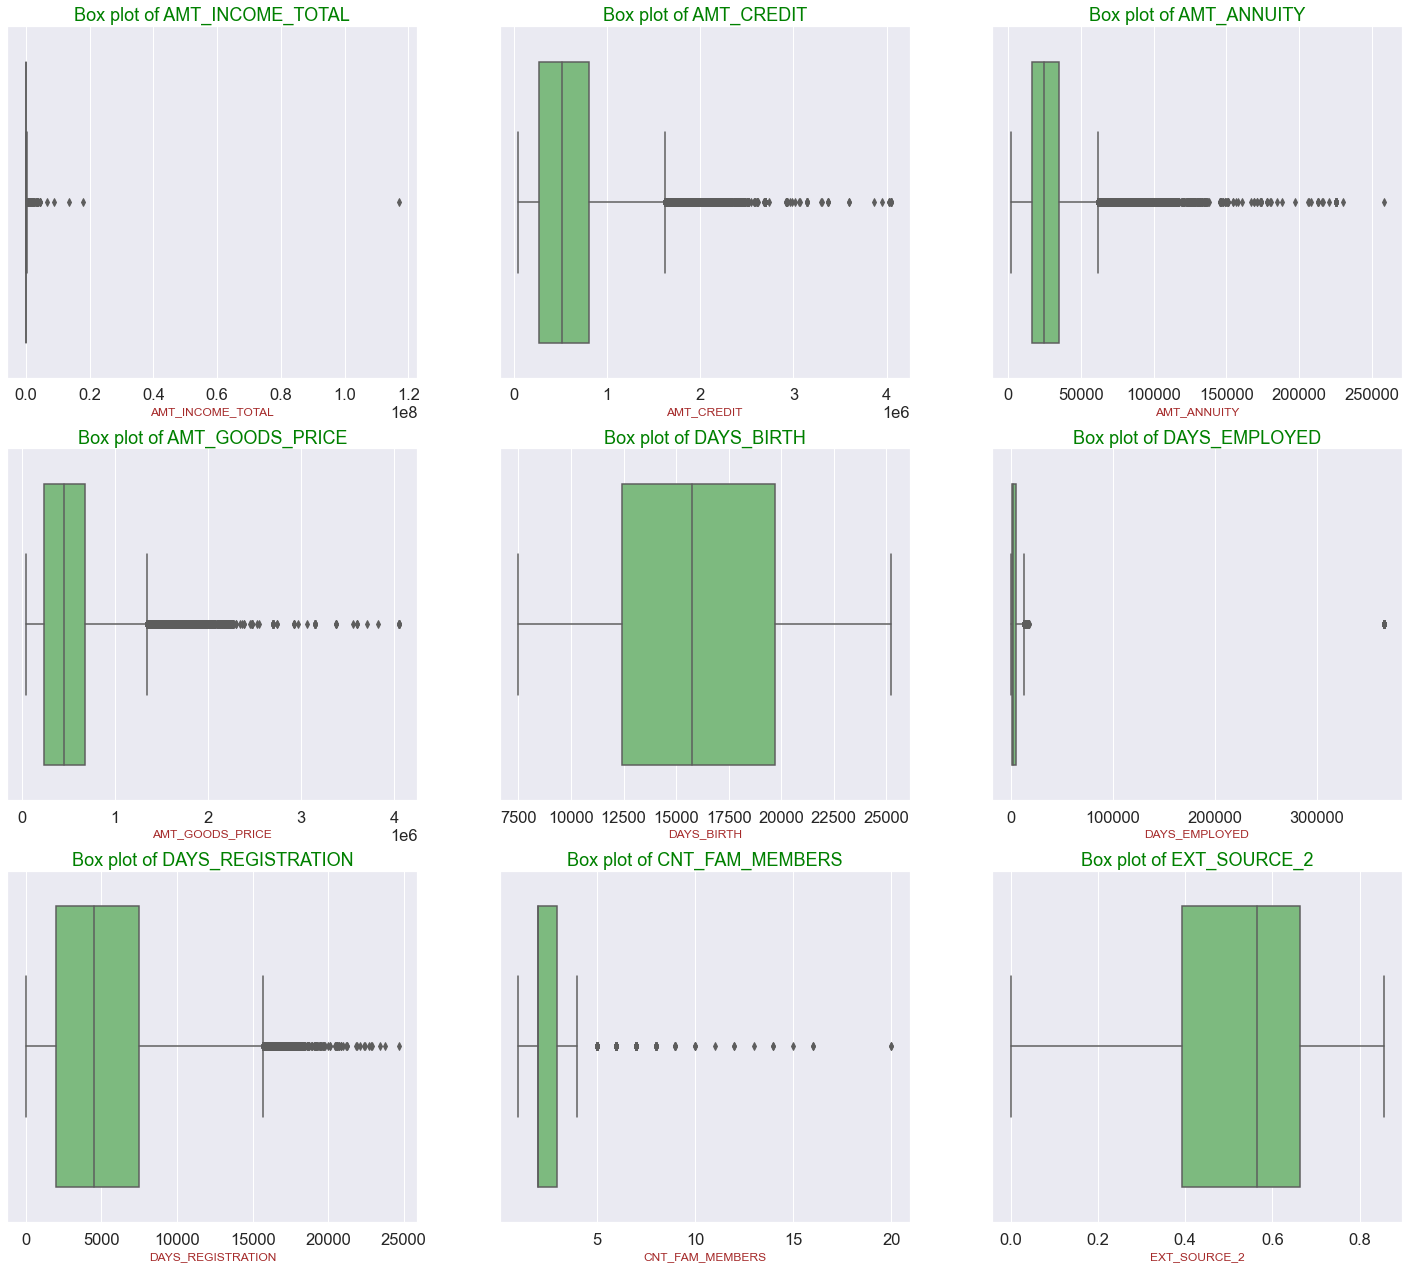

In [26]:
cols_to_check= ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 
                'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2']

#box plot of selected numeric columns

sns.set(font_scale = 1.5)
plt.figure(figsize=[25,22])

for i, col in enumerate(cols_to_check, 1):
    plt.subplot(3,3,i)
    title_text= f'Box plot of {col}'
    x_label= f'{col}'
    fig = sns.boxplot(data= app_df_new, x= col, palette= 'Greens')
    fig.set_title(title_text, fontdict= { 'fontsize': 18, 'color': 'Green'})
    fig.set_xlabel(x_label, fontdict= {'fontsize': 12, 'color': 'Brown'})

### Outlier Observations

1. AMT_INCOME_TOTAL (Income of the client) column we can see income of a client almost 120M, that is an outlier.

In [27]:
app_df_new[app_df_new.AMT_INCOME_TOTAL > 100000000]

# Exact value is 117M

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840      114967      1         Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840               Y             1       117000000.0    562491.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
12840      26194.5         454500.0   Unaccompanied          Working   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840  Secondary / secondary special            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
12840                    0.010643       12615            922   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH FLAG_MOBIL FLAG_EMP_PHONE  \
12840             6762.0             3643          1              1   

      FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE  \
12840               0                1          0          0        Laborers   

       CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY  \
12840                3                    2                           2   

      WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
12840                    TUESDAY                       14   

      REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
12840                          0                          0   

      LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY  \
12840                           0                      0   

      REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
12840                      0                       0  Business Entity Type 3   

       EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
12840      0.113161      0.145543                       0.9791         0.1667   

       YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
12840                        0.9791          0.1667   

       YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
12840                        0.9791          0.1667          0.0715   

      EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
12840                  No                         0                         0   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
12840                         0                         0   

       DAYS_LAST_PHONE_CHANGE FLAG_DOCUMENT_2 FLAG_DOCUMENT_3 FLAG_DOCUMENT_4  \
12840                       0               0               1               0   

      FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7 FLAG_DOCUMENT_8  \
12840               0               0               0               0   

      FLAG_DOCUMENT_9 FLAG_DOCUMENT_10 FLAG_DOCUMENT_11 FLAG_DOCUMENT_12  \
12840               0                0                0                0   

      FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16  \
12840                0                0                0                0   

      FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
12840                0                0                0                0   

      FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
12840                0                           0                          0   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
12840                           0                          0   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
12840                          0                           1

2. For AMT_CREDIT columns: We can see very few Credit amount of the loan are above 3 Million.
3. AMT_ANNUITY: For Loan Annuity amount we can see value above 250k, that can be treated as outlier.
4. AMT_GOODS_PRICE: For consumer loans it is the price of the goods for which the loan is given. There is an outlier above 4 Million. Infect it can be seen that there are very few observations between 3.5 and 4 Million.
5. DAYS_BIRTH: Client's age in days at the time of application. There is no outlier. Most of the clients have age between (12500/365) ~ 34 Years to (20000/365) ~ 55 Years.
6. DAYS_EMPLOYED: How many days before the application the person started current employment. We can see an outlier having value more than 300000 days. That does not make sense. We will investigate it below.

In [28]:
app_df_new.loc[app_df_new.DAYS_EMPLOYED > 300000, 'DAYS_EMPLOYED']

8         365243
11        365243
23        365243
38        365243
43        365243
           ...  
307469    365243
307483    365243
307487    365243
307505    365243
307507    365243
Name: DAYS_EMPLOYED, Length: 55374, dtype: int64

In [29]:
#Immediate next value after 365243

app_df_new.loc[app_df_new.DAYS_EMPLOYED < 365243, 'DAYS_EMPLOYED'].max()

17912

There are 55374 observations having DAYS_EMPLOYED= 365243 Days that is 1000 years. It's surely some garbage data and should be treated as missing value.
If we ignore this value (365243) and again boxplot for DAYS_EMPLOYED, we can see some outlier above value of 17500 days.

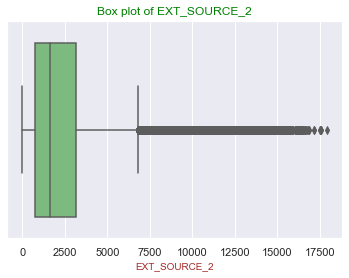

In [30]:
sns.set(font_scale = 1)
fig= sns.boxplot(app_df_new[app_df_new.DAYS_EMPLOYED < 365243].DAYS_EMPLOYED, palette= 'Greens')
fig.set_title(title_text, fontdict= { 'fontsize': 12, 'color': 'Green'})
fig.set_xlabel(x_label, fontdict= {'fontsize': 10, 'color': 'Brown'})
plt.show()

7. DAYS_REGISTRATION: How many days before the application did client change his registration. We can see few values between 24k and 25k. These should be treated as outliers.

8. CNT_FAM_MEMBERS: How many family members does client have. We can see outliers at value 20. We can also see there are very few observations above 15.

9. EXT_SOURCE_2: Normalized score from external data source. We can not see any outliers. Most of the scores are between .4 and .65

### Binning Continuous Variables

#### Binning based on AMT_INCOME_TOTAL

In [31]:
app_df_new['INCOME_SLAB']= pd.qcut(app_df_new['AMT_INCOME_TOTAL'], q= [0, .05, 0.25, 0.5, 0.75, 0.95, 1], 
                                labels= ['Very Low', 'Low', 'Lower-Medium', 'Higher-Medium', 'High', 'Very High'])

app_df_new['INCOME_SLAB'].head()

0    Higher-Medium
1             High
2         Very Low
3     Lower-Medium
4     Lower-Medium
Name: INCOME_SLAB, dtype: category
Categories (6, object): ['Very Low' < 'Low' < 'Lower-Medium' < 'Higher-Medium' < 'High' < 'Very High']

#### Calculating Age and Binning from DAYS_BIRTH

In [32]:
print(np.floor((app_df_new['DAYS_BIRTH'].min())/365))
print(np.floor((app_df_new['DAYS_BIRTH'].max())/365))

20.0
69.0


In [33]:
app_df_new['AGE_GROUP']= pd.cut(np.floor((app_df_new['DAYS_BIRTH']/365)), [20, 30, 40, 50, 60, 70], 
                                labels= ['Age 20-30', 'Age 31-40', 'Age 41-50', 'Age 51-60', 'Age above 60'])

app_df_new['AGE_GROUP'].head()

0    Age 20-30
1    Age 41-50
2    Age 51-60
3    Age 51-60
4    Age 51-60
Name: AGE_GROUP, dtype: category
Categories (5, object): ['Age 20-30' < 'Age 31-40' < 'Age 41-50' < 'Age 51-60' < 'Age above 60']

## 4. Analysis of Application dataset

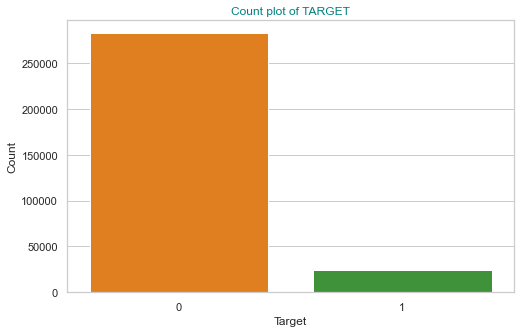

In [34]:
### Checking TARGET variable

sns.set_style("whitegrid")
plt.figure(figsize=[8,5])
sns.countplot(app_df_new.TARGET, palette= 'Paired_r')
plt.title('Count plot of TARGET', fontdict= {'fontsize': 12, 'color': 'Teal'})
plt.xlabel('Target', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.show()

In [35]:
app_df_new.TARGET.value_counts(normalize= True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

There is a huge class imbalance in the dataset. Almost 91.9% data is of Target 0 and only 8.1% data is of Target 1.

### Dividing data into 2 datsets:

In [36]:
app_df_new_0= app_df_new[app_df_new.TARGET==0]
print('Shape of app_df_new_0:', app_df_new_0.shape)
app_df_new_1= app_df_new[app_df_new.TARGET==1]
print('Shape of app_df_new_1:', app_df_new_1.shape)

Shape of app_df_new_0: (282686, 83)
Shape of app_df_new_1: (24825, 83)


### Univariate Analysis

#### Univariate Analysis of Categorical Variables

In [111]:
# Creating function to create countplot for univariate analysis of categorical variables

def cat_univariate(col, fn_sup=14, fn_s=12, figsize=[18,7], xtick_ro= 0):
    t0_col = float(len(app_df_new_0))
    t1_col = float(len(app_df_new_1))
    sns.set_style("whitegrid")
    fig= plt.figure(figsize= figsize)
    f1_x_label= f'{col} for Target= 0'
    f2_x_label= f'{col} for Target= 1'
    ax1= fig.add_subplot(1,2,1)
    ax1.set_xticklabels(f1_x_label, rotation = xtick_ro, ha="right",  fontdict= {'fontsize': fn_s, 'color': 'Teal'})
    ax2= fig.add_subplot(1,2,2)
    ax2.set_xticklabels(f2_x_label, rotation = xtick_ro, ha="right",  fontdict= {'fontsize': fn_s, 'color': 'Teal'})
    sup_t= f'Count plot for {col}'
    fig.suptitle(sup_t, fontdict= {'fontsize': fn_sup, 'color': 'Teal'})
    fig1= sns.countplot(data= app_df_new_0, x= col, ax= ax1, palette= 'Paired')
    fig2= sns.countplot(data= app_df_new_1, x= col, ax= ax2, palette= 'Paired_r')
    fig1.set_ylabel('Count', fontdict= {'fontsize': fn_s, 'color': 'Black'})
    fig1.set_xlabel(f1_x_label, fontdict= {'fontsize': fn_s, 'color': 'Black'})
    fig2.set_xlabel(f2_x_label, fontdict= {'fontsize': fn_s, 'color': 'Black'})
    for patch in fig1.patches:
        percentage = '{:.1f}%'.format(100 * patch.get_height()/t0_col)
        x = patch.get_x() + patch.get_width()
        y = patch.get_height()
        fig1.annotate(percentage, (patch.get_x() + patch.get_width() / 2.,
                patch.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 5), textcoords = 'offset points', fontsize= 11, family='verdana')
        
    for patch2 in fig2.patches:
        percentage = '{:.1f}%'.format(100 * patch2.get_height()/t1_col)
        x = patch2.get_x() + patch2.get_width()
        y = patch2.get_height()
        fig2.annotate(percentage, (patch2.get_x() + patch2.get_width() / 2.,
                patch2.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 5), textcoords = 'offset points', fontsize= 11, family='verdana')
    

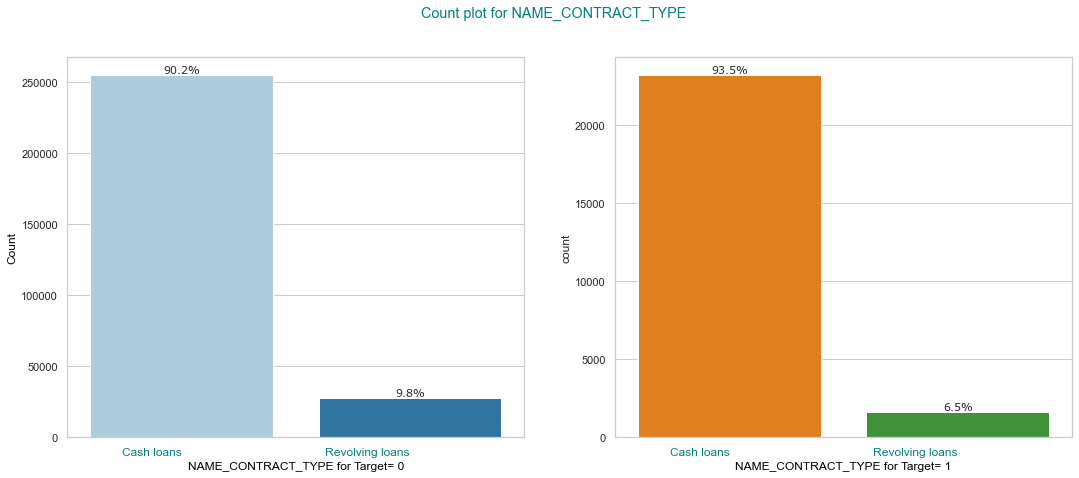

In [112]:
cat_univariate('NAME_CONTRACT_TYPE')

It can be seen that Number of Cash loan is higher than revolving loan, in both the cases (For Target=0 and 1)

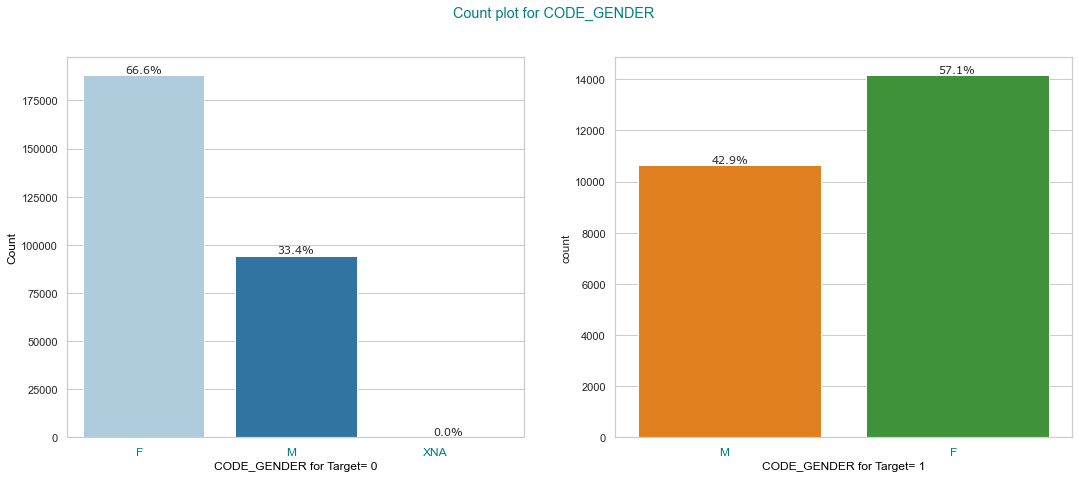

In [113]:
cat_univariate('CODE_GENDER')

From the visual we can see number of Female clients are much higher than the number of Male clients. Again if we compare the proportion, Male to Female proportion is almost 1:2 for Target=0. But for Target=1 Male client to Female client proportion is higher in compare to Target 0.
So Female clients are less likely to face payment difficulties than Male clients.

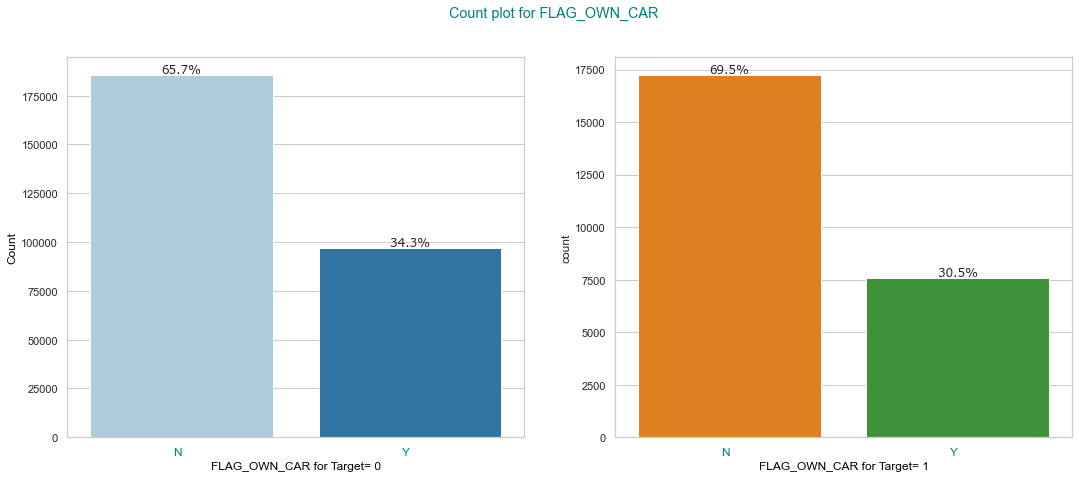

In [102]:
cat_univariate('FLAG_OWN_CAR')

If we compare the proportions in both the graphs, there is not much of a difference. Clients having car/cars are slightly better in repaying the loans.

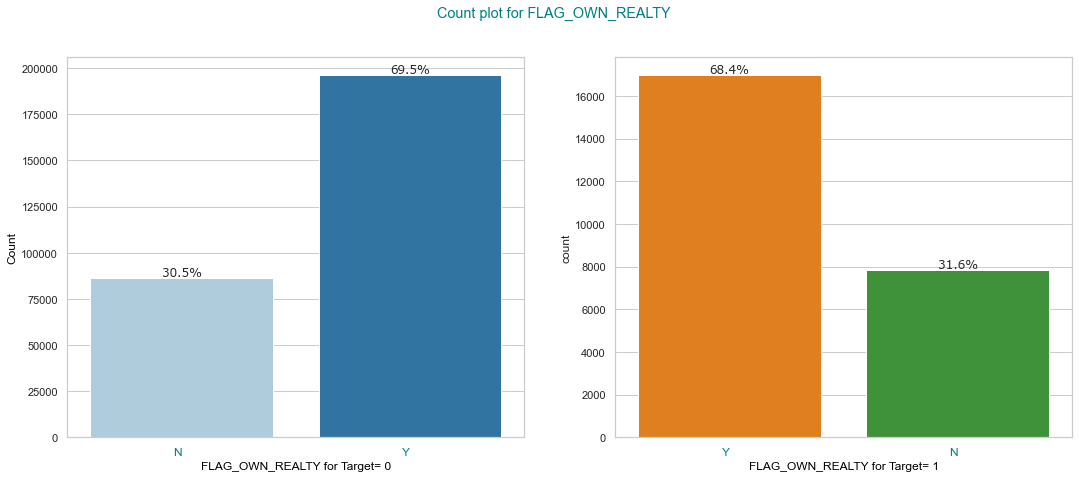

In [103]:
cat_univariate('FLAG_OWN_REALTY')

This flag denotes if the client owns a house or flat. Ratio of 'Y' and 'N' flags are almost same in both the groups. Most of the clients own house or flat.

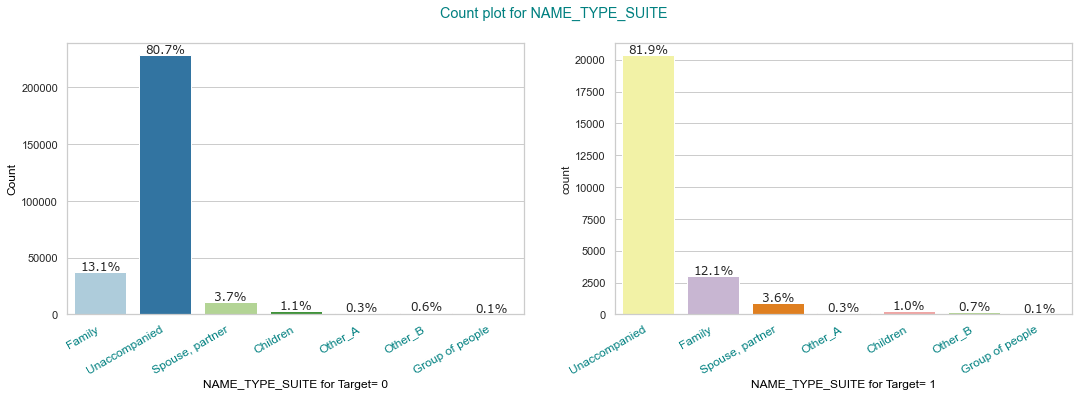

In [104]:
cat_univariate('NAME_TYPE_SUITE', figsize=[18,5], xtick_ro= 30)

This variable denotes who was accompanying client when he was applying for the loan. For both Target 0 and Target 1 the distribution is almost same and most of the client came alone during loan application.

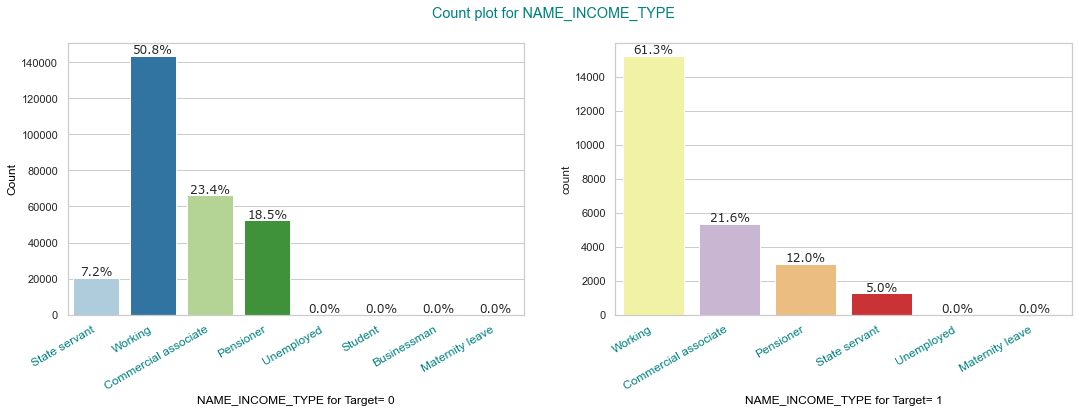

In [105]:
cat_univariate('NAME_INCOME_TYPE', figsize=[18,5], xtick_ro= 30)

Most of the clients taken loan are of working class. Also they have bit higher chance of failing to repay the loan. As 61.3% of clients with payment difficulties are of working class, where it's bit lesser, 50.8% for Target 0.
Pensioners are more likely to repay the loan in compare to other income classes. The reason could be, the pensioners have a fixed stable income and they may take loan of a calculated amount, so that the monthly installment can be covered using the pension income.

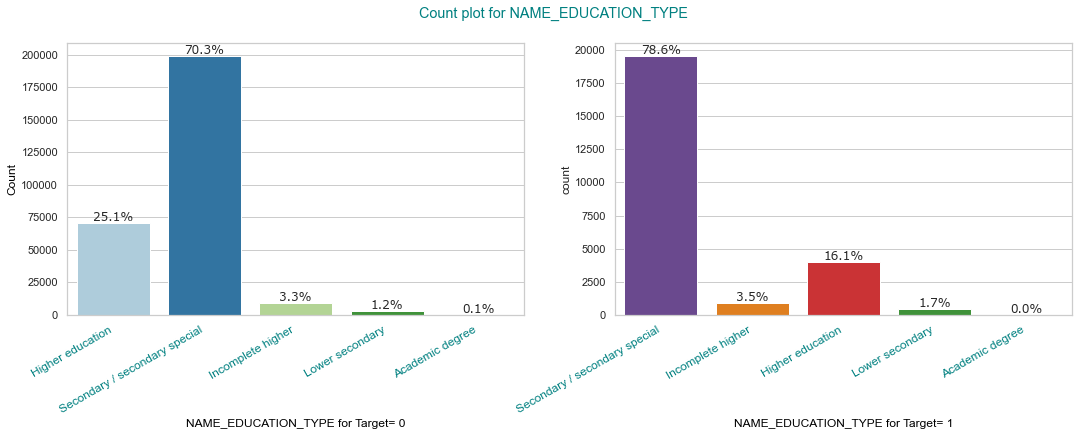

In [106]:
cat_univariate('NAME_EDUCATION_TYPE', figsize=[18,5], xtick_ro= 30)

Bank has given most of the loans to the people who have "Secondary/ Secondary Special" education. In this to plots, if we compare we can see only the clients having "Higher Education" are more likely to repay the loans better than other education groups. Bank should consider the education as an important parameter before approving the loan.

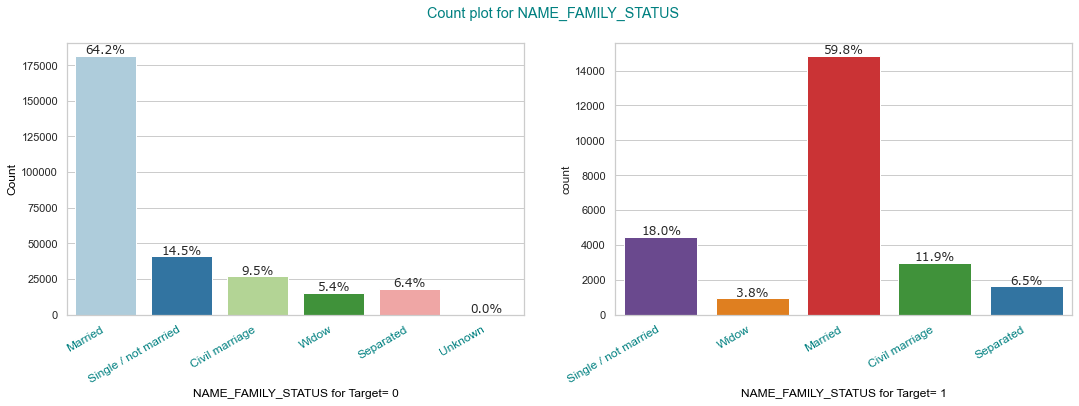

In [107]:
cat_univariate('NAME_FAMILY_STATUS', figsize=[18,5], xtick_ro= 30)

Most of the clients are "Married" and they are less likely to face difficulties in loan repayment. Where Single, Window and other groups are more likely to default on the loan. The reason could be Married people may do more financial planning in compare to single peoples.

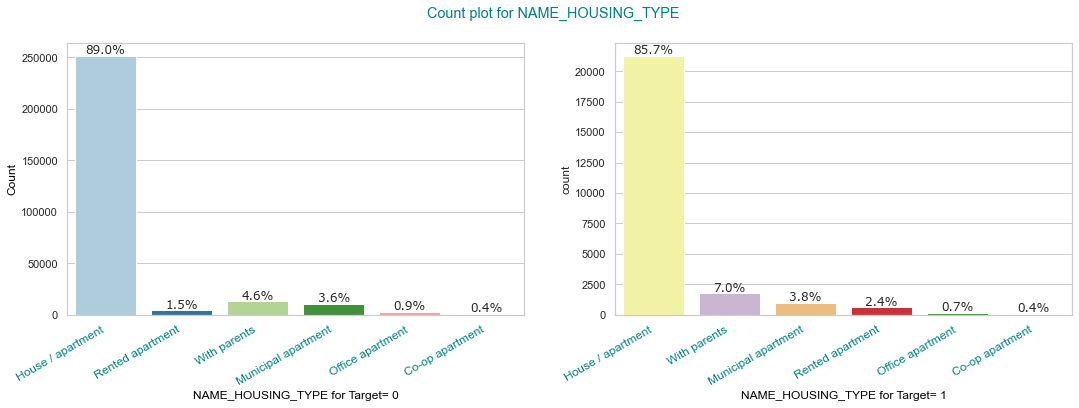

In [108]:
cat_univariate('NAME_HOUSING_TYPE', figsize=[18,5], xtick_ro= 30)

Here, we can the clients living with their parents are more likely to face difficulties in loan repayment.

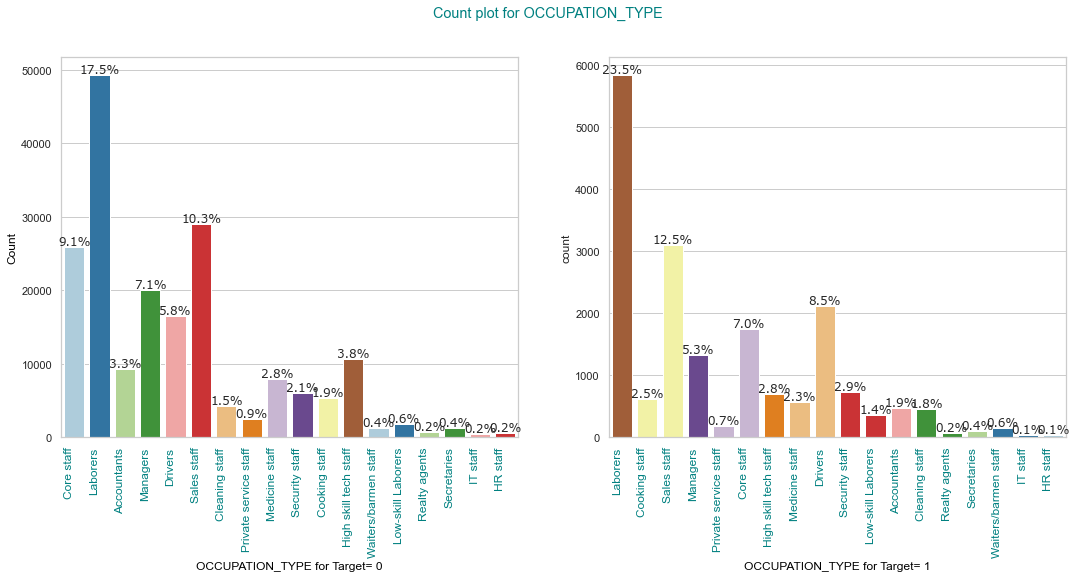

In [109]:
cat_univariate('OCCUPATION_TYPE', figsize=[18,7], xtick_ro= 90)

Most of the clients are Laborers and they are facing more difficulties in repaying the loan in compare to Managers, Accountants, Core Staff, High Skill tech Staff etc. higher paying jobs.

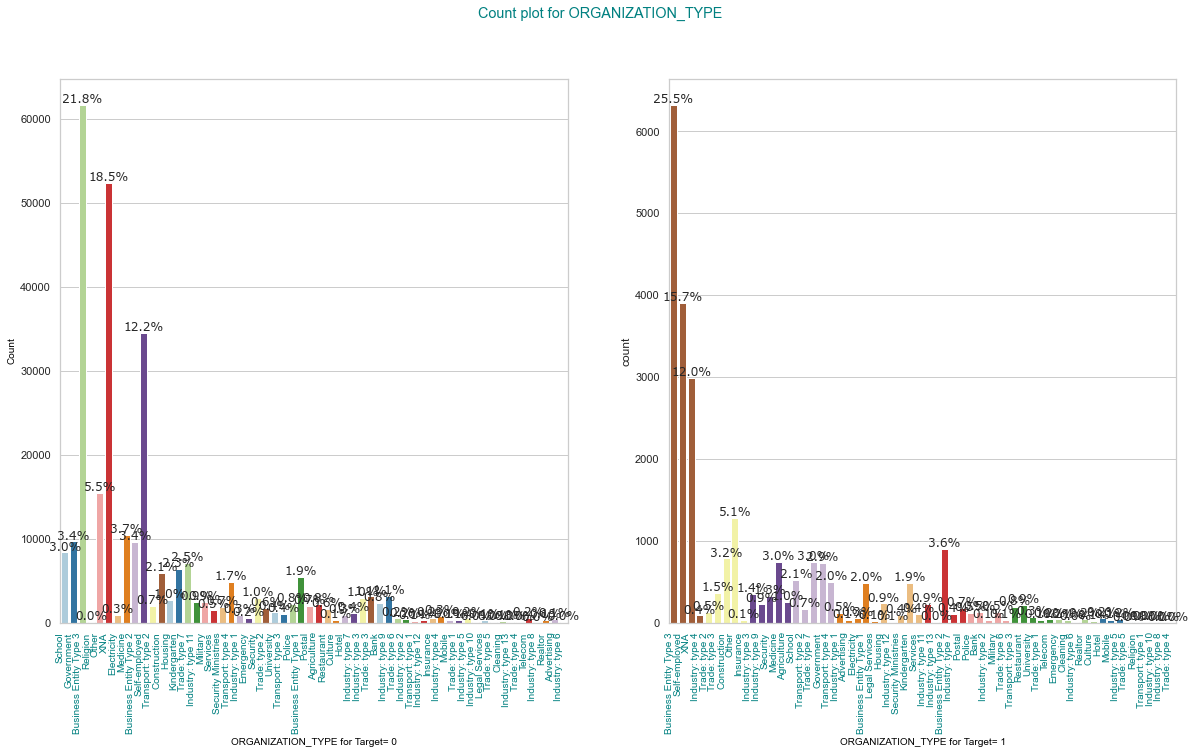

In [110]:
cat_univariate('ORGANIZATION_TYPE', figsize=[20,10], xtick_ro= 90, fn_s= 10)

Most of the clients works in 'Business Entity Type 3'. They are also the highest in number who are facing difficulties in loan repayment.

#### Univariate Analysis of Numeric Variables

In [49]:
if col=='AMT_INCOME_TOTAL':
        fig1= sns.histplot(app_df_new_0[(app_df_new_0[col].notna()) & (app_df_new_0['INCOME_SLAB']== income_slab)][col], 
                           kde= True, ax= ax1)
        fig2= sns.histplot(app_df_new_1[(app_df_new_1[col].notna()) & (app_df_new_1['INCOME_SLAB']== income_slab)][col], 
                           kde= True, ax= ax2)

In [50]:
def num_univariate(col, fn_sup=14, fn_s=12, figsize=[18,7], xtick_ro= 0, income_slab= 'Higher-Medium'):
    sns.set_style("whitegrid")
    fig= plt.figure(figsize= figsize)
    sup_t= f'Density plot for {col}'
    fig.suptitle(sup_t, fontdict= {'fontsize': fn_sup, 'color': 'Teal'})
    if col=='AMT_INCOME_TOTAL':
        sns.distplot(app_df_new_0[(app_df_new_0[col].notna()) & (app_df_new_0['INCOME_SLAB']== income_slab)][col],
                     hist= False, label='All other cases')
        sns.distplot(app_df_new_1[(app_df_new_1[col].notna()) & (app_df_new_1['INCOME_SLAB']== income_slab)][col],
                     hist= False, label='Client with payment difficulties')
    sns.distplot(app_df_new_0[app_df_new_0[col].notna()][col], hist= False, label='All other cases')
    sns.distplot(app_df_new_1[app_df_new_1[col].notna()][col], hist= False, label='Client with payment difficulties')
    plt.legend(labels=['All other cases (0)','Client with payment difficulties (1)'])


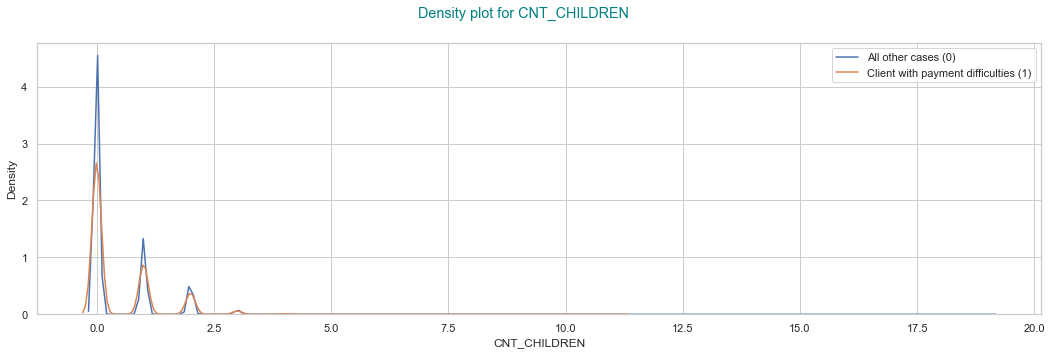

In [51]:
num_univariate('CNT_CHILDREN', figsize=[18,5])

As AMT_INCOME_TOTAL is very distributed plotting it directly does not give good insight. Previously we have created bins based on income ['Very Low', 'Low', 'Lower-Medium', 'Higher-Medium', 'High', 'Very High']
Here we are comparing distribution of AMT_INCOME_TOTAL for LOWER-MEDIUM income group.

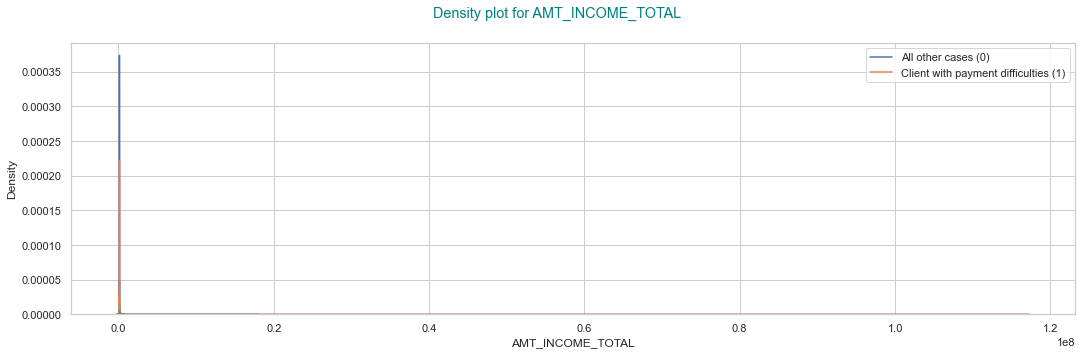

In [52]:
num_univariate('AMT_INCOME_TOTAL', figsize=[18,5], income_slab='Lower-Medium')

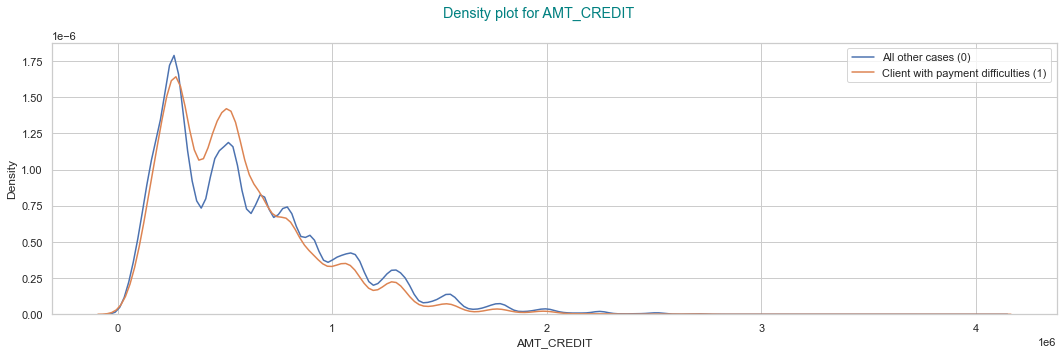

In [53]:
num_univariate('AMT_CREDIT', figsize=[18,5]) 

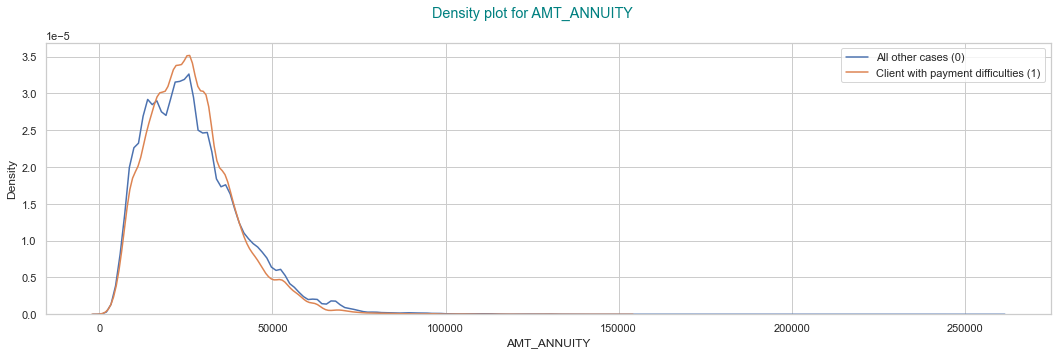

In [54]:
num_univariate('AMT_ANNUITY', figsize=[18,5]) 

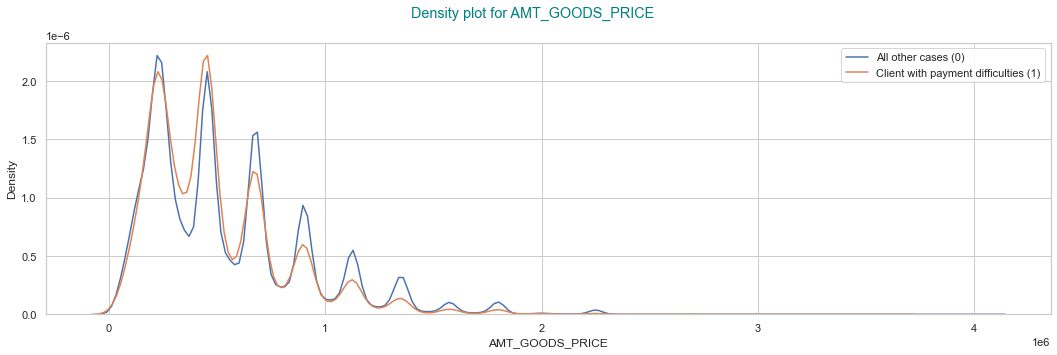

In [55]:
num_univariate('AMT_GOODS_PRICE', figsize=[18,5]) 

There are not much difference in distribution of these numeric variable for TARGET=0 and TARGET=1 observations.

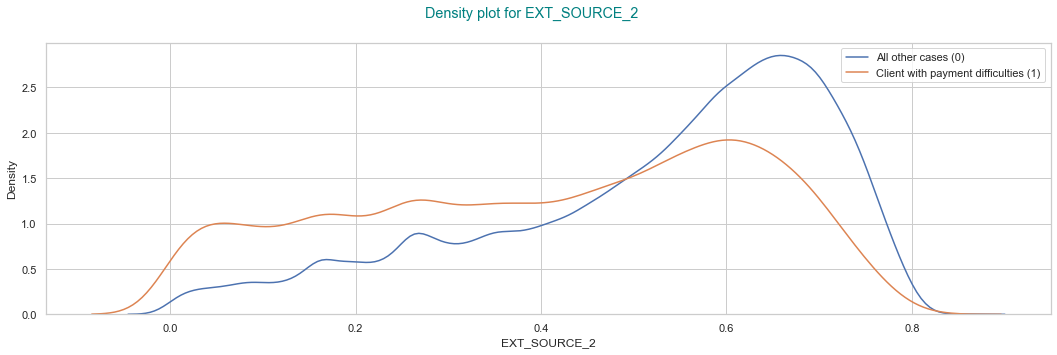

In [56]:
num_univariate('EXT_SOURCE_2', figsize=[18,5]) 

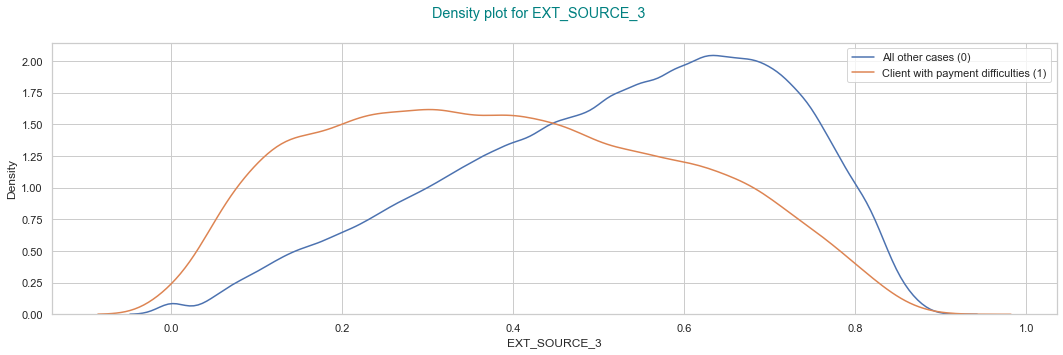

In [57]:
num_univariate('EXT_SOURCE_3', figsize=[18,5]) 

EXT_SOURCE_2 and EXT_SOURCE_3 denote Normalized score from external data source. In both the cases specially for EXT_SOURCE_3  we can see clients who are facing difficulties in loan repayment have lesser mode value that other group. Bank should give more importance to EXT_SOURCE_2 and EXT_SOURCE_3 scores specially on EXT_SOURCE_3 score before approving loan application, if the scores are available.

### Find co-relation of Numeric variables

In [58]:
#Finding Cooraltion of numeric columns for target=0

a= app_df_new_0.corr()
corr_0= a.where(np.triu(np.ones(a.shape), k=1).astype(np.bool))
corr_0= corr_0.unstack().dropna()
corr_0= pd.DataFrame(corr_0).reset_index()
corr_0.columns= ['Var 1','Var 2','correlation']
corr_0['abs_correlation']= np.abs(corr_0['correlation'])
corr_0.sort_values('abs_correlation', ascending= False).head(10)

Var 1                         Var 2  correlation  \
298      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE     0.998508   
206                FLOORSMAX_MEDI                 FLOORSMAX_AVG     0.997018   
186  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG     0.993582   
208                FLOORSMAX_MEDI                FLOORSMAX_MODE     0.988153   
13                AMT_GOODS_PRICE                    AMT_CREDIT     0.987250   
169                FLOORSMAX_MODE                 FLOORSMAX_AVG     0.985603   
151  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG     0.971032   
188  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE     0.962064   
56                CNT_FAM_MEMBERS                  CNT_CHILDREN     0.878571   
323      DEF_60_CNT_SOCIAL_CIRCLE      DEF_30_CNT_SOCIAL_CIRCLE     0.859332   

     abs_correlation  
298         0.998508  
206         0.997018  
186         0.993582  
208         0.988153  
13          0.987250  
169         0.985603  
151         0.971032  
188         0.962064  
56          0.878571  
323         0.859332

In [59]:
#Finding Cooraltion of numeric columns for Target=1

b= app_df_new_1.corr()
corr_1= b.where(np.triu(np.ones(b.shape), k=1).astype(np.bool))
corr_1= corr_1.unstack().dropna()
corr_1= pd.DataFrame(corr_1).reset_index()
corr_1.columns= ['Var 1','Var 2','correlation']
corr_1['abs_correlation']= np.abs(corr_1['correlation'])
corr_1.sort_values('abs_correlation', ascending= False).head(10)

Var 1                         Var 2  correlation  \
298      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE     0.998269   
206                FLOORSMAX_MEDI                 FLOORSMAX_AVG     0.997187   
186  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG     0.996124   
208                FLOORSMAX_MEDI                FLOORSMAX_MODE     0.989195   
169                FLOORSMAX_MODE                 FLOORSMAX_AVG     0.986594   
13                AMT_GOODS_PRICE                    AMT_CREDIT     0.983103   
151  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG     0.980466   
188  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE     0.978073   
56                CNT_FAM_MEMBERS                  CNT_CHILDREN     0.885484   
323      DEF_60_CNT_SOCIAL_CIRCLE      DEF_30_CNT_SOCIAL_CIRCLE     0.868994   

     abs_correlation  
298         0.998269  
206         0.997187  
186         0.996124  
208         0.989195  
169         0.986594  
13          0.983103  
151         0.980466  
188         0.978073  
56          0.885484  
323         0.868994

In both the case, for Target 0 and Target 1, Top 10 Variables with highest correlation are same.

### Bivariate Analysis

#### Bivariate Analysis of Numeric and Numeric Variables

<Figure size 1800x1584 with 0 Axes>

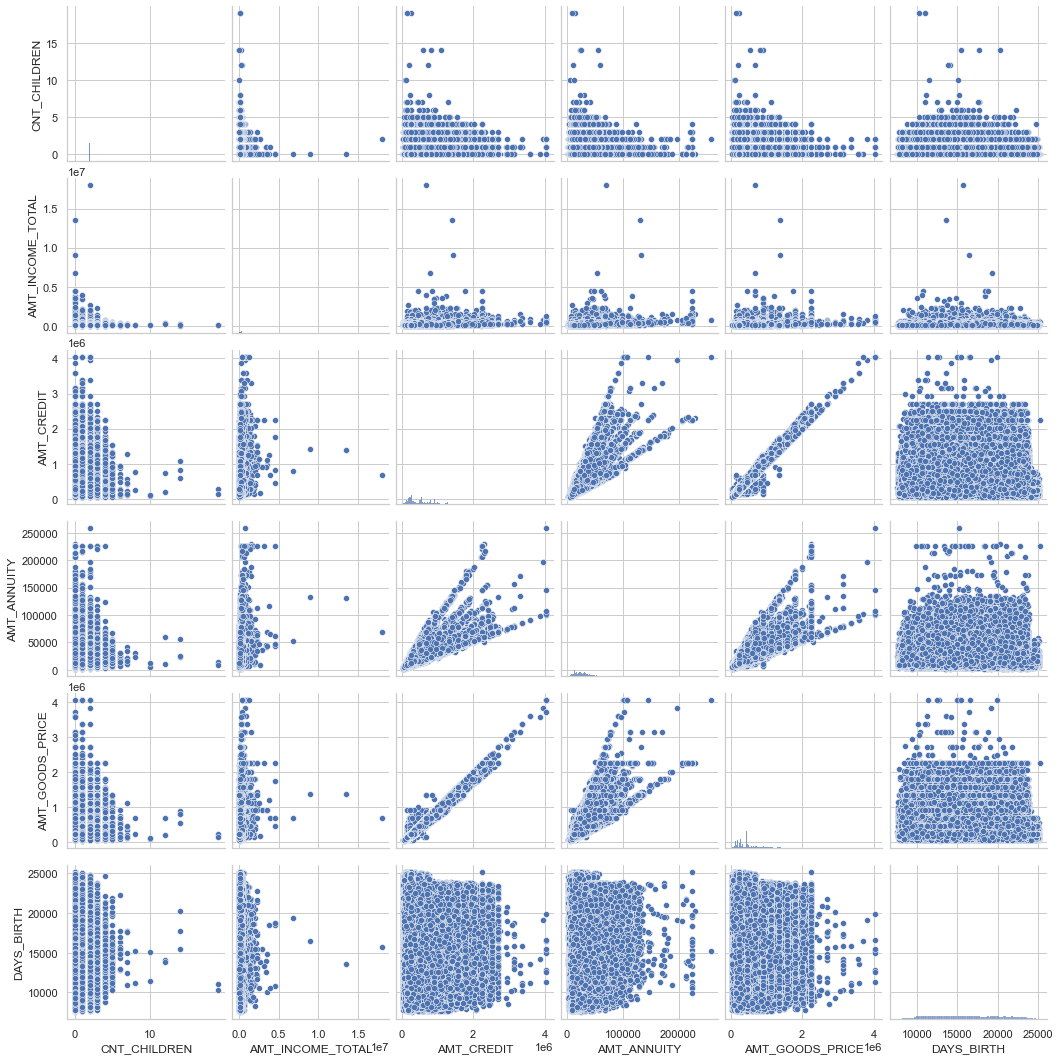

In [60]:
#For Target 0

plt.figure(figsize= [25,22])
cols_0= app_df_new_0[['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','DAYS_BIRTH']]
sns.pairplot(cols_0, dropna= True)
plt.show()

<Figure size 1800x1584 with 0 Axes>

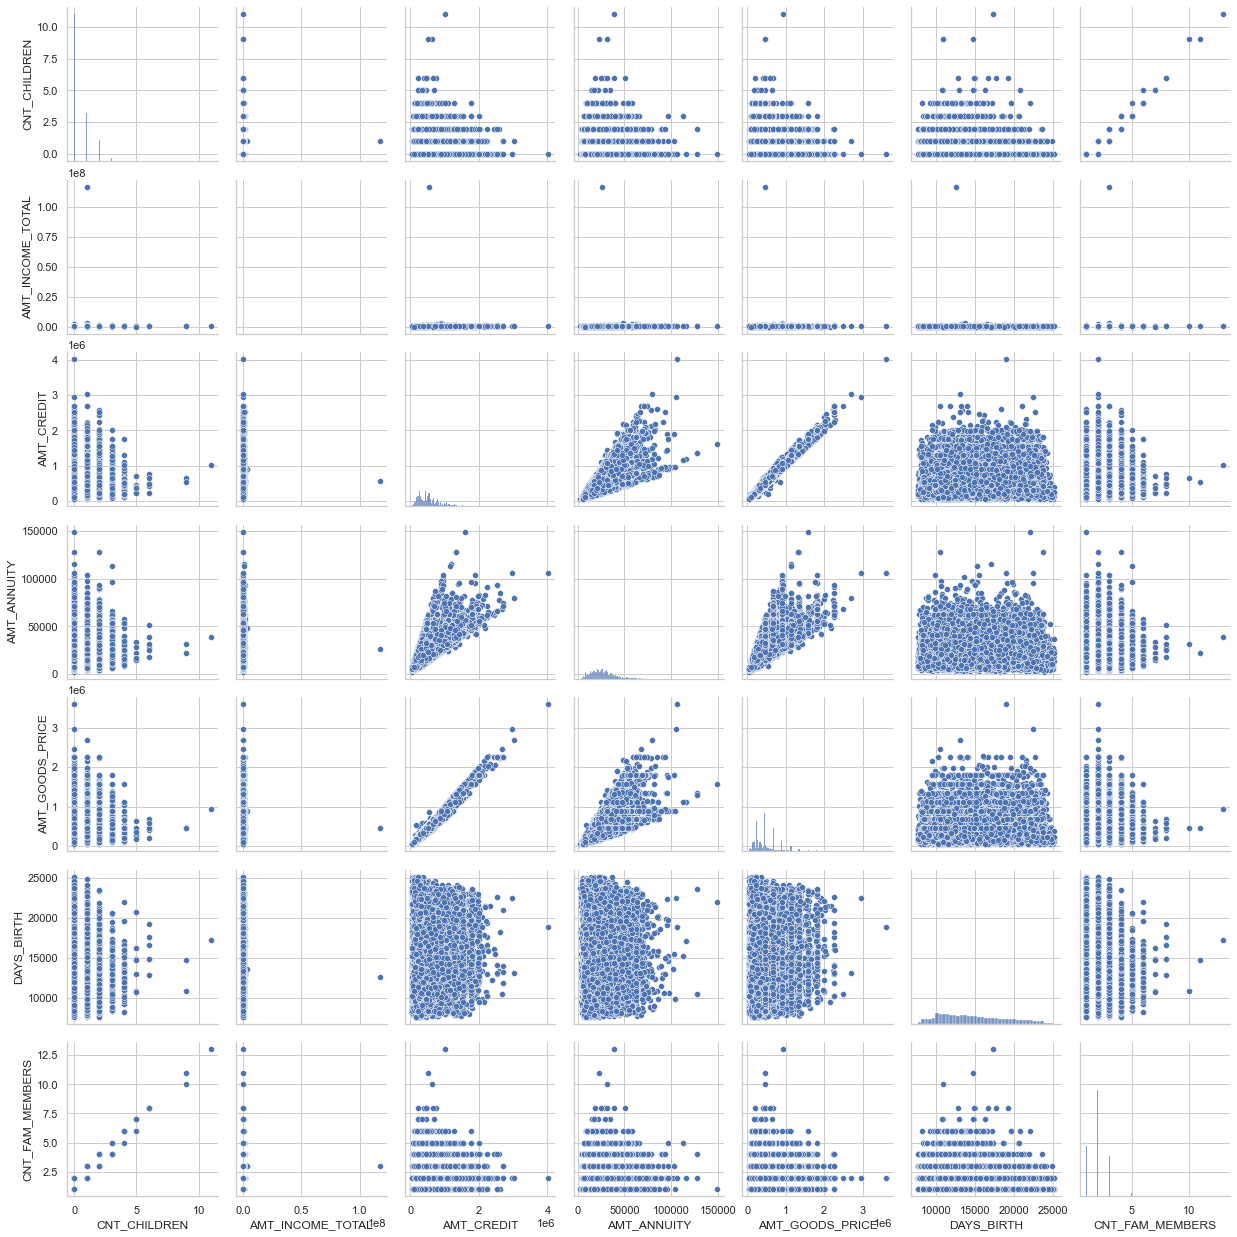

In [61]:
#For Target 1

plt.figure(figsize= [25,22])
cols_1= app_df_new_1[['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','DAYS_BIRTH',
                         'CNT_FAM_MEMBERS']]

sns.pairplot(cols_1, dropna= True)
plt.show()

Observations:
1. There is a strong positive linear relation between AMT_GOODS_PRICE and AMT_CREDIT.
2. There is a strong positive linear relation between CNT_CHILDREN and CNT_FAM_MEMBER.
3. There is a weak positive linear relation between AMT_ANNUITY and AMT_GOOD_PRICE.
4. There is a weak positive linear relation between AMT_CREDIT and AMT_ANNUITY.

#### Bivariate Analysis of Categorical and Categorical

In [62]:
#There are 20 Types of documents, calculating total count of different documents submitted by clients

docu_dict_0= {}
for i in app_df_new_0.columns:
    if i.startswith('FLAG_DOCUMENT_'):
        docu_dict_0[i]= app_df_new_0[app_df_new_0[i]==1].shape[0]

docu_dict_1= {}
for j in app_df_new_1.columns:
    if j.startswith('FLAG_DOCUMENT_'):
        docu_dict_1[j]= app_df_new_1[app_df_new_1[j]==1].shape[0]

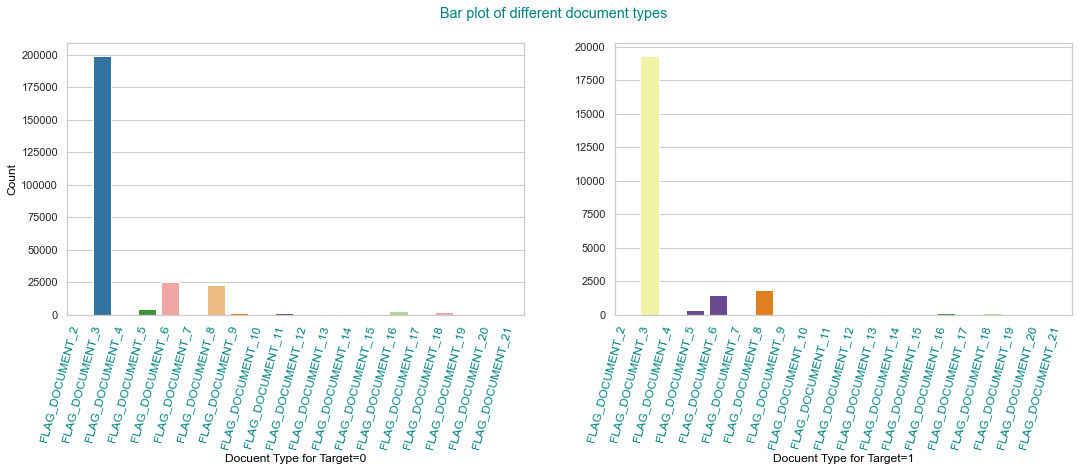

In [63]:
fig= plt.figure(figsize= [18,5])
fig.suptitle('Bar plot of different document types', fontdict= {'fontsize': 14, 'color': 'Teal'})
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
ax1.set_xticklabels(list(docu_dict_0.keys()), rotation = 75, ha="right",  fontdict= {'fontsize': 12, 'color': 'Teal'})
ax2.set_xticklabels(list(docu_dict_1.keys()), rotation = 75, ha="right",  fontdict= {'fontsize': 12, 'color': 'Teal'})
fig1= sns.barplot(x= list(docu_dict_0.keys()), y= list(docu_dict_0.values()), ax= ax1, palette= 'Paired')
fig2= sns.barplot(x= list(docu_dict_1.keys()), y= list(docu_dict_1.values()), ax= ax2, palette= 'Paired_r')
fig1.set_ylabel('Count', fontdict= {'fontsize': 12, 'color': 'Black'})
fig1.set_xlabel('Docuent Type for Target=0', fontdict= {'fontsize': 12, 'color': 'Black'})
fig2.set_xlabel('Docuent Type for Target=1', fontdict= {'fontsize': 12, 'color': 'Black'})
plt.show()

Most of the clients have submitted Document 3 during loan application. probably it's a mandatory document for a loan application. Clients who have also submitted Document 6 during loan application have lesser chance to face difficulties in paying loan installments. Bank needs to check Document 6 and making it a mandatory document may help to reduce defaults on loans.

In [64]:
'''There are 6 Types of contact informations flags, calculating total count of different types ofcontact information 
provided by clients. here value 1 means the client has provided the information
'''

contact_cols=['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']

cont_dict_0= {}
cont_dict_1= {}

for i in contact_cols:
    cont_dict_0[i]= app_df_new_0[app_df_new_0[i]==1].shape[0]


for j in contact_cols:
    cont_dict_1[j]= app_df_new_1[app_df_new_1[j]==1].shape[0]

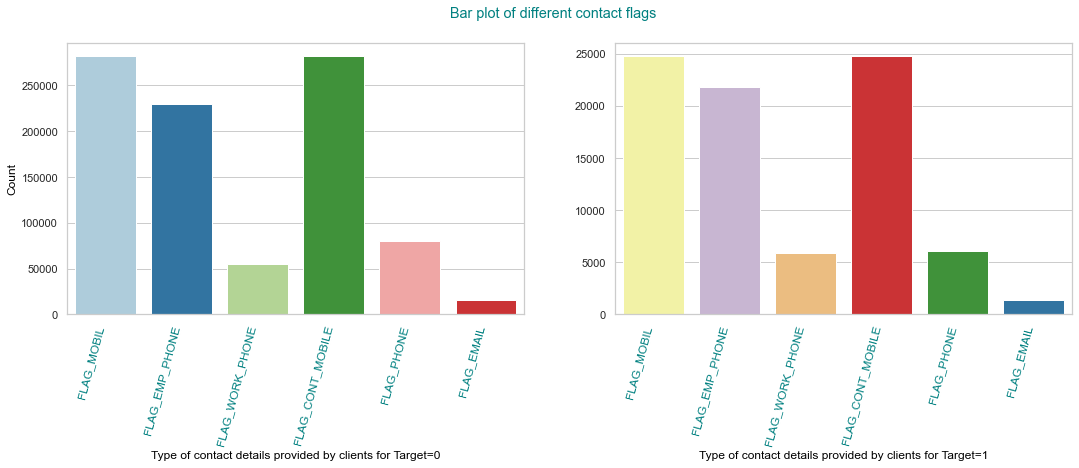

In [65]:
fig= plt.figure(figsize= [18,5])
fig.suptitle('Bar plot of different contact flags', fontdict= {'fontsize': 14, 'color': 'Teal'})
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
ax1.set_xticklabels(list(cont_dict_0.keys()), rotation = 75, ha="right",  fontdict= {'fontsize': 12, 'color': 'Teal'})
ax2.set_xticklabels(list(cont_dict_1.keys()), rotation = 75, ha="right",  fontdict= {'fontsize': 12, 'color': 'Teal'})
fig1= sns.barplot(x= list(cont_dict_0.keys()), y= list(cont_dict_0.values()), ax= ax1, palette= 'Paired')
fig2= sns.barplot(x= list(cont_dict_1.keys()), y= list(cont_dict_1.values()), ax= ax2, palette= 'Paired_r')
fig1.set_ylabel('Count', fontdict= {'fontsize': 12, 'color': 'Black'})
fig1.set_xlabel('Type of contact details provided by clients for Target=0', fontdict= {'fontsize': 12, 'color': 'Black'})
fig2.set_xlabel('Type of contact details provided by clients for Target=1', fontdict= {'fontsize': 12, 'color': 'Black'})
plt.show()

Most of the clients have provided their mobile number and value of FLAG_CONT_MOBILE and FLAG_MOBIL both are almost same, that means the clients were reachable on provided mobile number. So there is no significant case of fraud.

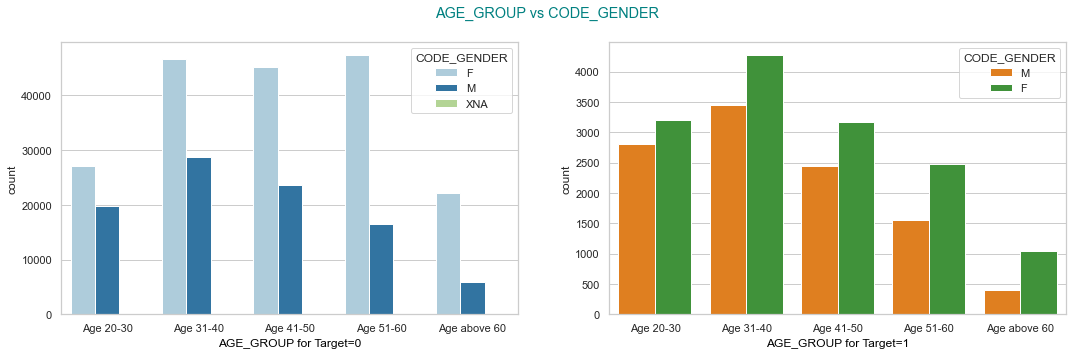

In [66]:
fig= plt.figure(figsize= [18,5])
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
fig.suptitle('AGE_GROUP vs CODE_GENDER', fontdict= {'fontsize': 14, 'color': 'Teal'})
fig1= sns.countplot(data= app_df_new_0, x= 'AGE_GROUP', hue= 'CODE_GENDER', ax= ax1, palette= 'Paired')
fig2= sns.countplot(data= app_df_new_1, x= 'AGE_GROUP', hue= 'CODE_GENDER', ax= ax2, palette= 'Paired_r')
fig1.set_xlabel('AGE_GROUP for Target=0', fontdict= {'fontsize': 12, 'color': 'Black'})
fig2.set_xlabel('AGE_GROUP for Target=1', fontdict= {'fontsize': 12, 'color': 'Black'})
plt.show()

It can be observed that Age group 20-30 and 31-40 face more difficulties in loan repayments in compare to other age groups. With increased age people more likely to face less difficulty in paying the loan. Here we can see people above age of 60 has the least chance of facing difficulties in paying loan. Previously we saw the same kind of insights for Pensioners. 'Above 60 years age' and 'Pensioners' both points to same group of peoples.

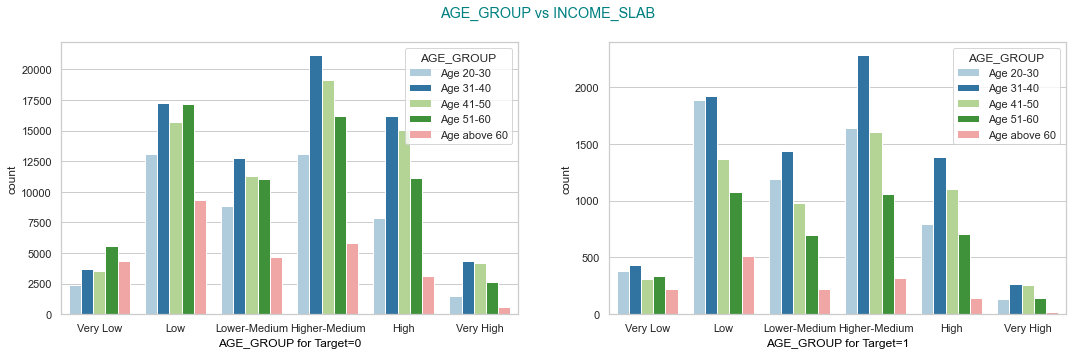

In [67]:
fig= plt.figure(figsize= [18,5])
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
fig.suptitle('AGE_GROUP vs INCOME_SLAB', fontdict= {'fontsize': 14, 'color': 'Teal'})
fig1= sns.countplot(data= app_df_new_0, x= 'INCOME_SLAB', hue= 'AGE_GROUP', ax= ax1, palette= 'Paired')
fig2= sns.countplot(data= app_df_new_1, x= 'INCOME_SLAB', hue= 'AGE_GROUP', ax= ax2, palette= 'Paired')
fig1.set_xlabel('AGE_GROUP for Target=0', fontdict= {'fontsize': 12, 'color': 'Black'})
fig2.set_xlabel('AGE_GROUP for Target=1', fontdict= {'fontsize': 12, 'color': 'Black'})
plt.show()

Low and Higher-Medium Income Slab people have highest proportion of facing difficulties in paying the loan. Again, in these two sections, people having Age group 20-30 and 31-40 are the highest in numbers.

So, peoples of age group 20-40 of Low ad Higher-Medium income groups are most likely face payment difficulties.

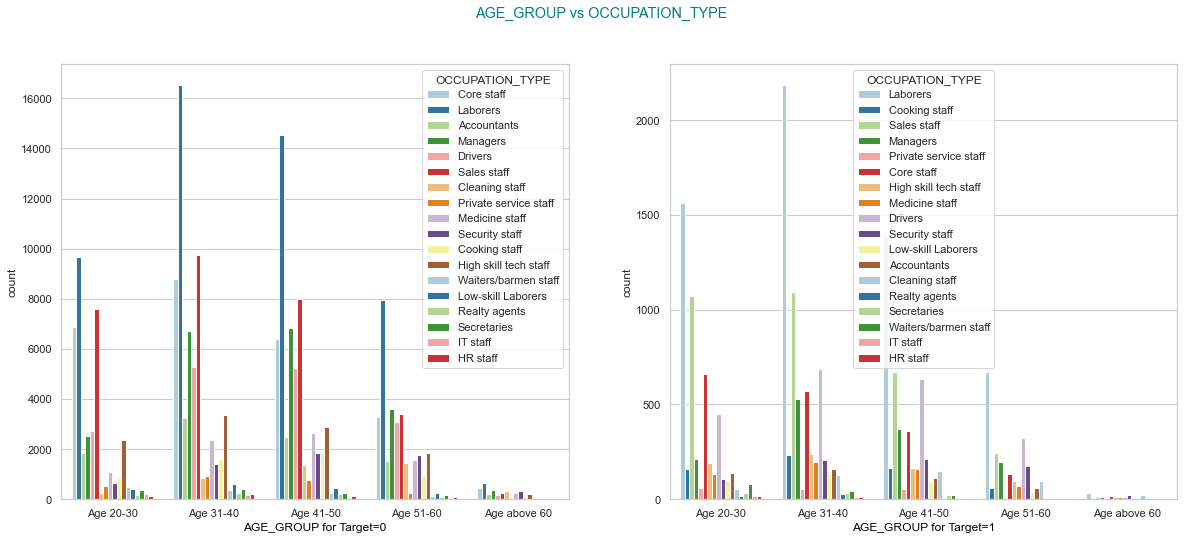

In [68]:
fig= plt.figure(figsize= [20,8])
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
fig.suptitle('AGE_GROUP vs OCCUPATION_TYPE', fontdict= {'fontsize': 14, 'color': 'Teal'})
fig1= sns.countplot(data= app_df_new_0, x= 'AGE_GROUP', hue= 'OCCUPATION_TYPE', ax= ax1, palette= 'Paired')
fig2= sns.countplot(data= app_df_new_1, x= 'AGE_GROUP', hue= 'OCCUPATION_TYPE', ax= ax2, palette= 'Paired')
fig1.set_xlabel('AGE_GROUP for Target=0', fontdict= {'fontsize': 12, 'color': 'Black'})
fig2.set_xlabel('AGE_GROUP for Target=1', fontdict= {'fontsize': 12, 'color': 'Black'})
plt.show()

In above plots it can be seen, most of the defaulters have occupation type Laborers.

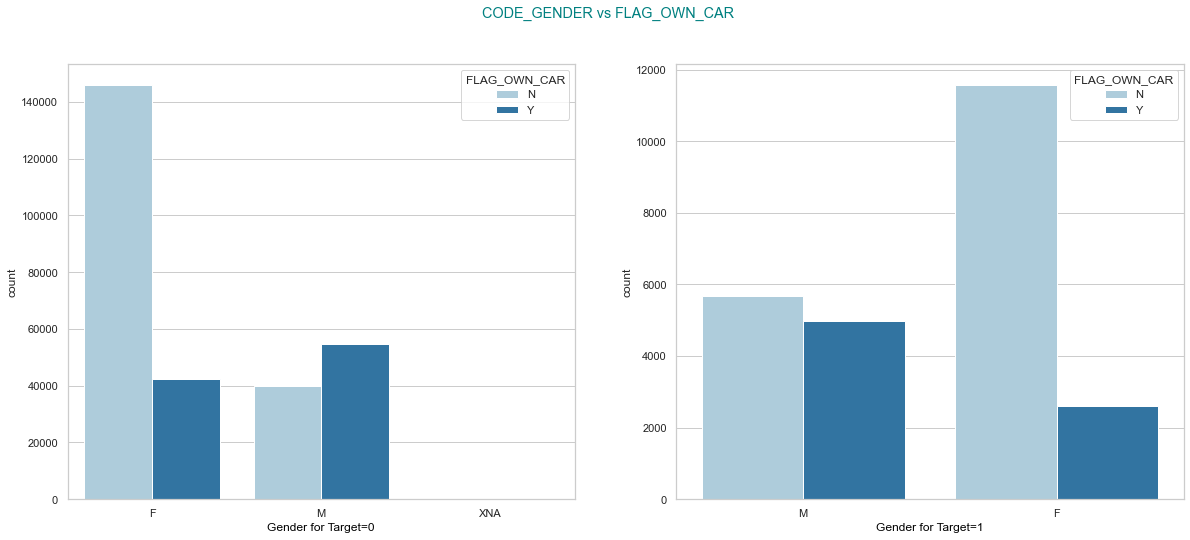

In [69]:
fig= plt.figure(figsize= [20,8])
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
fig.suptitle('CODE_GENDER vs FLAG_OWN_CAR', fontdict= {'fontsize': 14, 'color': 'Teal'})
fig1= sns.countplot(data= app_df_new_0, x= 'CODE_GENDER', hue= 'FLAG_OWN_CAR', ax= ax1, palette= 'Paired')
fig2= sns.countplot(data= app_df_new_1, x= 'CODE_GENDER', hue= 'FLAG_OWN_CAR', ax= ax2, palette= 'Paired')
fig1.set_xlabel('Gender for Target=0', fontdict= {'fontsize': 12, 'color': 'Black'})
fig2.set_xlabel('Gender for Target=1', fontdict= {'fontsize': 12, 'color': 'Black'})
plt.show()

Most of the customers as well as most of the people who are facing problem in paying back the loan are Female and most of the Female don't own a car. For Male and Female both, if they have car they are less likely to face difficulties in repaying the loan.

#### Bivariate Analysis of Categorical and Numeric

In [244]:
def num_cat_bivar(col1, col2, fn_sup=14, fn_s=12, xtick_ro= 0, palette= 'Greens'):
    sns.set_style("whitegrid")
    plt.figure(figsize= [18,5])
    title_t= f'{col1} vs {col2}'
    fig = sns.catplot(data= app_df_new, x= col1, y= col2, kind= 'box', col="TARGET", height= 6, aspect= 1.1, palette= palette)
    fig.set_xticklabels(rotation= xtick_ro)
    plt.suptitle(title_t,  fontdict= {'fontsize': fn_sup, 'color': 'Teal'})
    fig.set_ylabels(col2, fontdict= {'fontsize': fn_s, 'color': 'Teal'})
    fig.set_xlabels(col1, fontdict= {'fontsize': fn_s, 'color': 'Teal'})

<Figure size 1296x360 with 0 Axes>

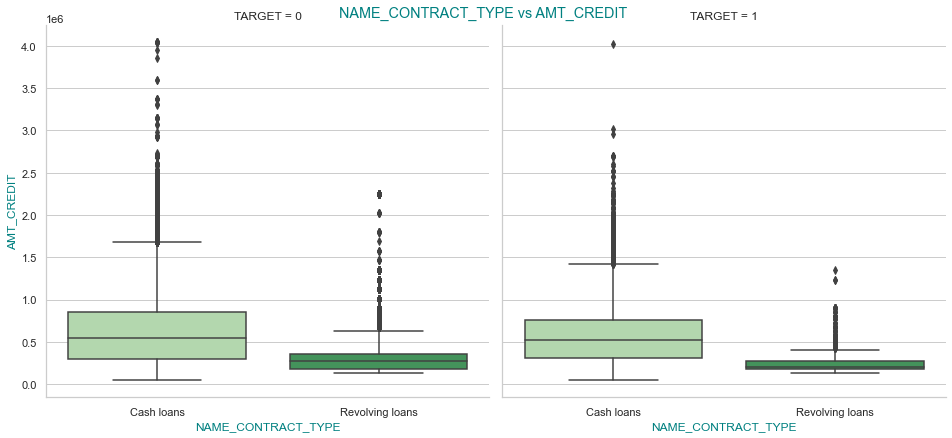

In [245]:
num_cat_bivar(col1='NAME_CONTRACT_TYPE', col2='AMT_CREDIT') 

Credited amount median values of 'Cash loans' is exactly same for both type of clients (0,1). Median value of'Revolving loans' is slightly lower for the clients with payment difficulties. We can see outliers in both the plots.

<Figure size 1296x360 with 0 Axes>

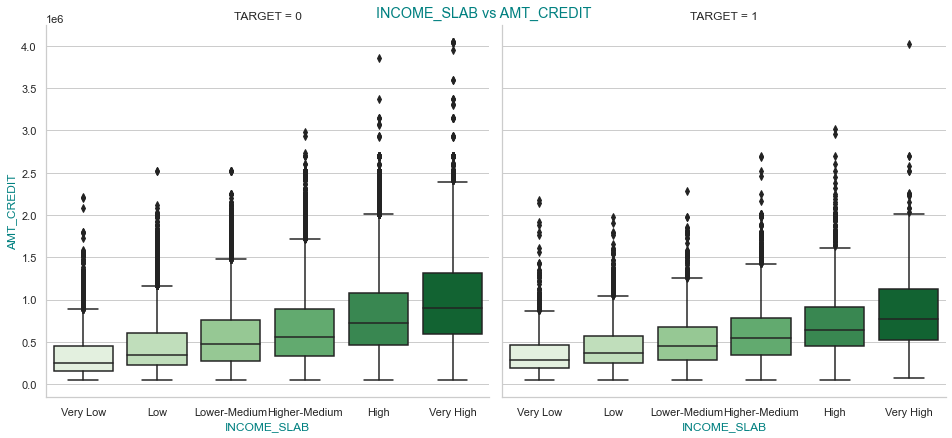

In [246]:
num_cat_bivar('INCOME_SLAB', 'AMT_CREDIT')

Outliers can be observed in both the plots. Median values of credited amount for different INCOME SLABS are almost same in both TARGET type. We can also see increase in credited amount median value for higher income slabs.

<Figure size 1296x360 with 0 Axes>

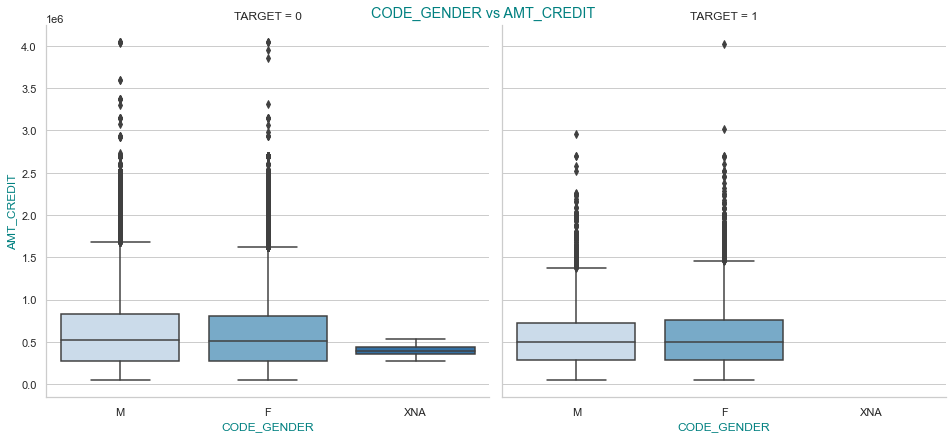

In [247]:
num_cat_bivar('CODE_GENDER', 'AMT_CREDIT', palette= 'Blues')

There is not much difference in the plots for TARGET=0 and 1.

<Figure size 1296x360 with 0 Axes>

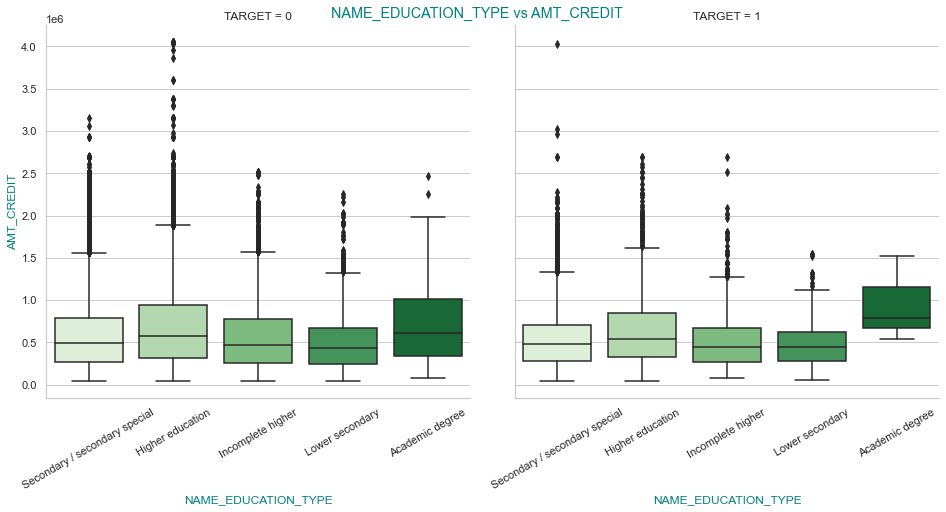

In [248]:
num_cat_bivar('NAME_EDUCATION_TYPE', 'AMT_CREDIT', xtick_ro= 30)

Median value of Amount credit is higher for clients having 'Academic degree' and for Target=1 this value is even higher and most of the values are between 50 to 75 percentile.

<Figure size 1296x360 with 0 Axes>

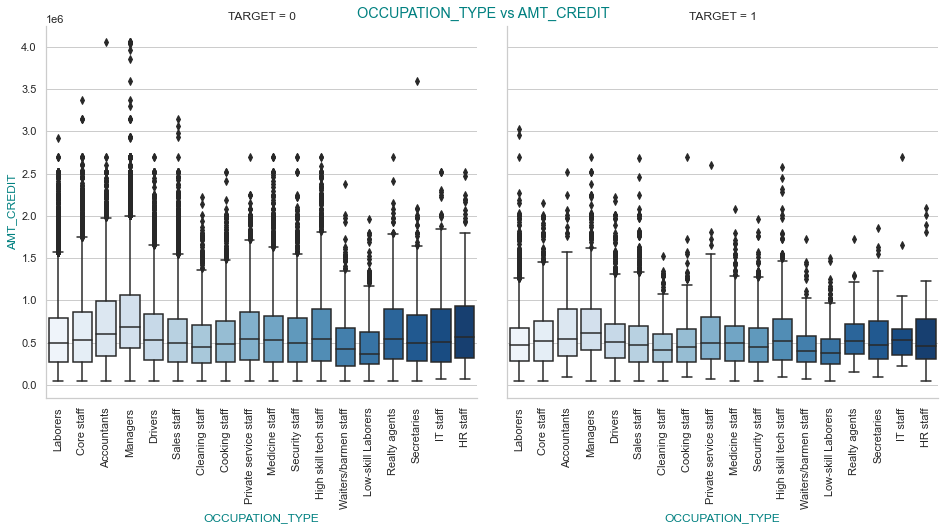

In [251]:
num_cat_bivar(col1= 'OCCUPATION_TYPE',col2= 'AMT_CREDIT', palette= 'Blues', xtick_ro= 90)

Median value of Credited amount is the highest for Managers and Lowest for Low-skill Laborers in both the plots.

<Figure size 1296x360 with 0 Axes>

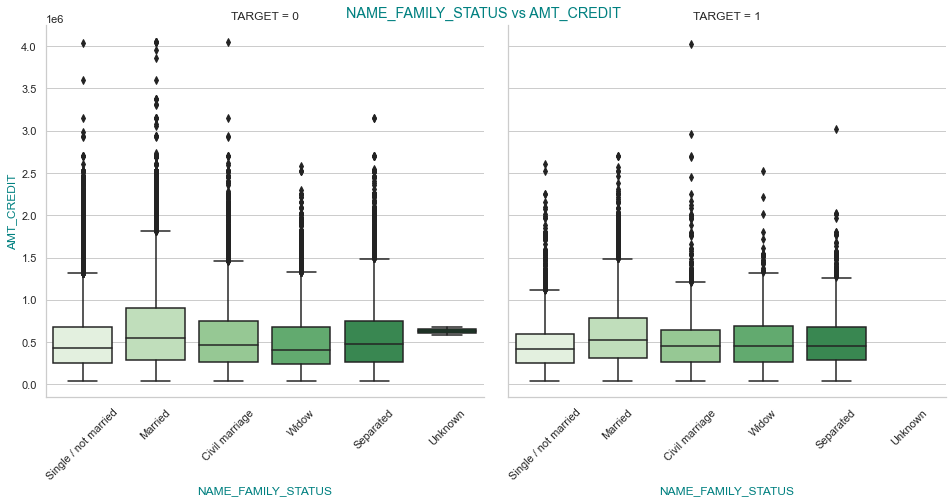

In [250]:
num_cat_bivar(col1= 'NAME_FAMILY_STATUS',col2= 'AMT_CREDIT', palette= 'Greens', xtick_ro= 45)

Median value of Credited amount is the highest for Married clients and lowest for Single/ not married clients in both the cases. Median values of different groups are almost same for TARGET=0 and TARGET=1 clients.

### 5. Analysis on Previous data

In [253]:
prev_df= pd.read_csv('previous_application.csv')

In [254]:
prev_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [255]:
# Finding Percentage of missing value for all columns:

missing_prev= (prev_df.isna().sum()*100/prev_df.shape[0])
missing_prev.sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

In [256]:
prev_df.describe().T

count          mean            std  \
SK_ID_PREV                 1670214.0  1.923089e+06  532597.958696   
SK_ID_CURR                 1670214.0  2.783572e+05  102814.823849   
AMT_ANNUITY                1297979.0  1.595512e+04   14782.137335   
AMT_APPLICATION            1670214.0  1.752339e+05  292779.762387   
AMT_CREDIT                 1670213.0  1.961140e+05  318574.616546   
AMT_DOWN_PAYMENT            774370.0  6.697402e+03   20921.495410   
AMT_GOODS_PRICE            1284699.0  2.278473e+05  315396.557937   
HOUR_APPR_PROCESS_START    1670214.0  1.248418e+01       3.334028   
NFLAG_LAST_APPL_IN_DAY     1670214.0  9.964675e-01       0.059330   
RATE_DOWN_PAYMENT           774370.0  7.963682e-02       0.107823   
RATE_INTEREST_PRIMARY         5951.0  1.883569e-01       0.087671   
RATE_INTEREST_PRIVILEGED      5951.0  7.735025e-01       0.100879   
DAYS_DECISION              1670214.0 -8.806797e+02     779.099667   
SELLERPLACE_AREA           1670214.0  3.139511e+02    7127.443459   
CNT_PAYMENT                1297984.0  1.605408e+01      14.567288   
DAYS_FIRST_DRAWING          997149.0  3.422099e+05   88916.115834   
DAYS_FIRST_DUE              997149.0  1.382627e+04   72444.869708   
DAYS_LAST_DUE_1ST_VERSION   997149.0  3.376777e+04  106857.034789   
DAYS_LAST_DUE               997149.0  7.658240e+04  149647.415123   
DAYS_TERMINATION            997149.0  8.199234e+04  153303.516729   
NFLAG_INSURED_ON_APPROVAL   997149.0  3.325702e-01       0.471134   

                                    min           25%           50%  \
SK_ID_PREV                 1.000001e+06  1.461857e+06  1.923110e+06   
SK_ID_CURR                 1.000010e+05  1.893290e+05  2.787145e+05   
AMT_ANNUITY                0.000000e+00  6.321780e+03  1.125000e+04   
AMT_APPLICATION            0.000000e+00  1.872000e+04  7.104600e+04   
AMT_CREDIT                 0.000000e+00  2.416050e+04  8.054100e+04   
AMT_DOWN_PAYMENT          -9.000000e-01  0.000000e+00  1.638000e+03   
AMT_GOODS_PRICE            0.000000e+00  5.084100e+04  1.123200e+05   
HOUR_APPR_PROCESS_START    0.000000e+00  1.000000e+01  1.200000e+01   
NFLAG_LAST_APPL_IN_DAY     0.000000e+00  1.000000e+00  1.000000e+00   
RATE_DOWN_PAYMENT         -1.497876e-05  0.000000e+00  5.160508e-02   
RATE_INTEREST_PRIMARY      3.478125e-02  1.607163e-01  1.891222e-01   
RATE_INTEREST_PRIVILEGED   3.731501e-01  7.156448e-01  8.350951e-01   
DAYS_DECISION             -2.922000e+03 -1.300000e+03 -5.810000e+02   
SELLERPLACE_AREA          -1.000000e+00 -1.000000e+00  3.000000e+00   
CNT_PAYMENT                0.000000e+00  6.000000e+00  1.200000e+01   
DAYS_FIRST_DRAWING        -2.922000e+03  3.652430e+05  3.652430e+05   
DAYS_FIRST_DUE            -2.892000e+03 -1.628000e+03 -8.310000e+02   
DAYS_LAST_DUE_1ST_VERSION -2.801000e+03 -1.242000e+03 -3.610000e+02   
DAYS_LAST_DUE             -2.889000e+03 -1.314000e+03 -5.370000e+02   
DAYS_TERMINATION          -2.874000e+03 -1.270000e+03 -4.990000e+02   
NFLAG_INSURED_ON_APPROVAL  0.000000e+00  0.000000e+00  0.000000e+00   

                                    75%          max  
SK_ID_PREV                 2.384280e+06  2845382.000  
SK_ID_CURR                 3.675140e+05   456255.000  
AMT_ANNUITY                2.065842e+04   418058.145  
AMT_APPLICATION            1.803600e+05  6905160.000  
AMT_CREDIT                 2.164185e+05  6905160.000  
AMT_DOWN_PAYMENT           7.740000e+03  3060045.000  
AMT_GOODS_PRICE            2.340000e+05  6905160.000  
HOUR_APPR_PROCESS_START    1.500000e+01       23.000  
NFLAG_LAST_APPL_IN_DAY     1.000000e+00        1.000  
RATE_DOWN_PAYMENT          1.089091e-01        1.000  
RATE_INTEREST_PRIMARY      1.933299e-01        1.000  
RATE_INTEREST_PRIVILEGED   8.525370e-01        1.000  
DAYS_DECISION             -2.800000e+02       -1.000  
SELLERPLACE_AREA           8.200000e+01  4000000.000  
CNT_PAYMENT                2.400000e+01       84.000  
DAYS_FIRST_DRAWING         3.652430e+05   365243.000  
DAYS_FIRST_DUE

### Univariate Analysis

#### Univariate Analysis of Categorical Variables

In [257]:
def cat_univariate_prev(col, fn_sup=14, fn_s=12, figsize= [10,6], xtick_ro= 0, palette= 'Paired'):
    t_col = float(len(prev_df))
    sns.set_style("whitegrid")
    fig= plt.figure(figsize= figsize)
    f1_x_label= f'{col}'
    sup_t= f'Count plot for {col}'
    plt.title(sup_t, fontdict= {'fontsize': 14, 'color': 'Teal'})
    plt.xticks(rotation= xtick_ro)
    fig= sns.countplot(data= prev_df, x= col, palette= palette)
    fig.set_ylabel('Count', fontdict= {'fontsize': fn_s, 'color': 'Teal'})
    fig.set_xlabel(f1_x_label, fontdict= {'fontsize': fn_s, 'color': 'Teal'})
    for patch in fig.patches:
        percentage = '{:.1f}%'.format(100 * patch.get_height()/t_col)
        x = patch.get_x() + patch.get_width()
        y = patch.get_height()
        fig.annotate(percentage, (patch.get_x() + patch.get_width() / 2.,
                patch.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 5), textcoords = 'offset points')

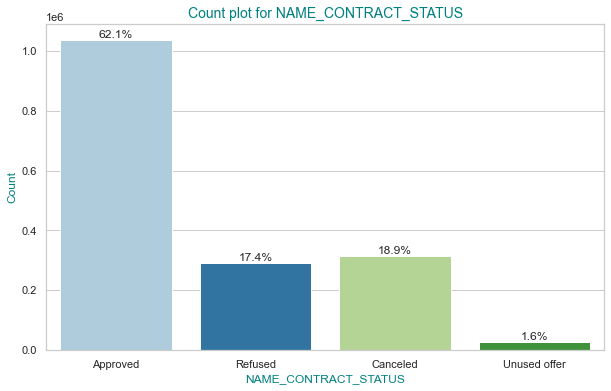

In [258]:
cat_univariate_prev('NAME_CONTRACT_STATUS')

Most of the loan applications are 'Approved' and only 1.6% are 'Unused offer'.

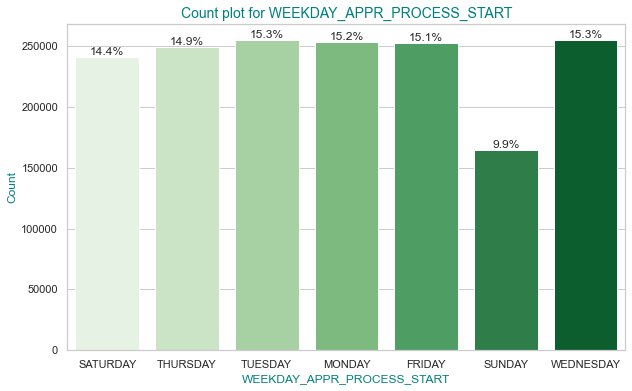

In [259]:
cat_univariate_prev('WEEKDAY_APPR_PROCESS_START', palette= 'Greens')

On sunday numbers of loan applications are the least and it's highest on Tuesday and Wednesday.

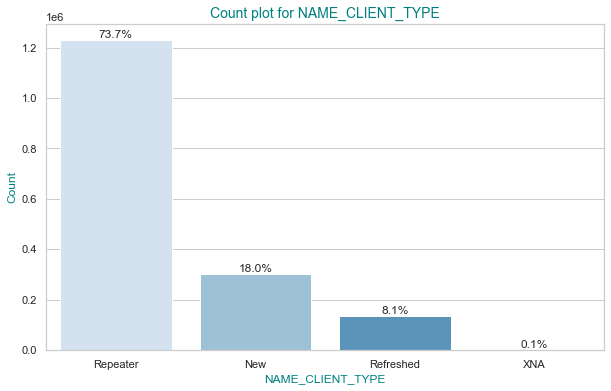

In [260]:
cat_univariate_prev('NAME_CLIENT_TYPE', palette= 'Blues')

Most of the clients in previous applications are Repeater clients.

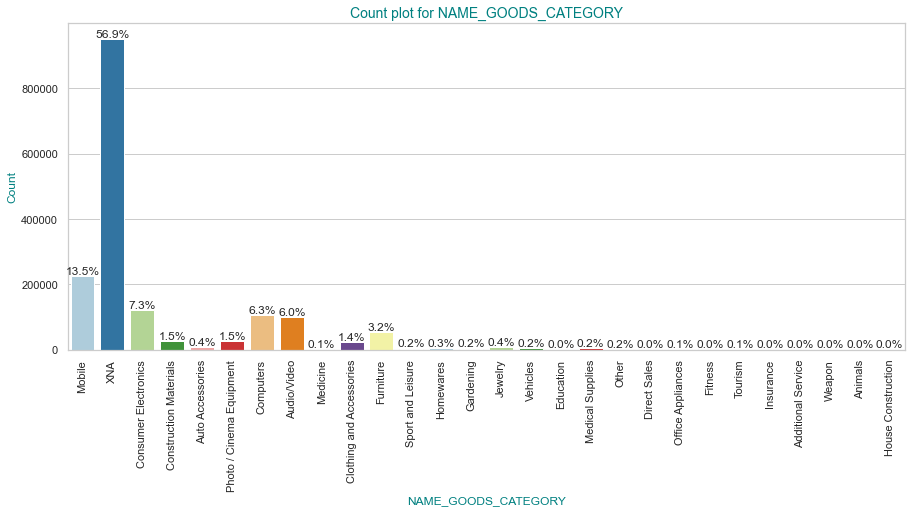

In [87]:
cat_univariate_prev('NAME_GOODS_CATEGORY', figsize= [15,6], xtick_ro= 90)

Most of the previous application Loans are taken for Mobile, Consumer Electronics, Computers, Audio/Video.

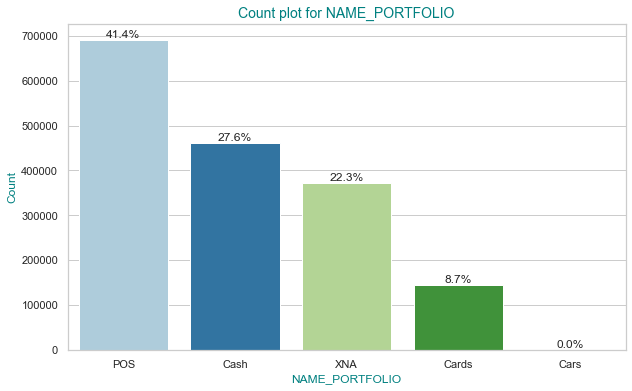

In [88]:
cat_univariate_prev('NAME_PORTFOLIO')

Most of the previous applications are related to Point of Sale (POS) then followed by Cash.

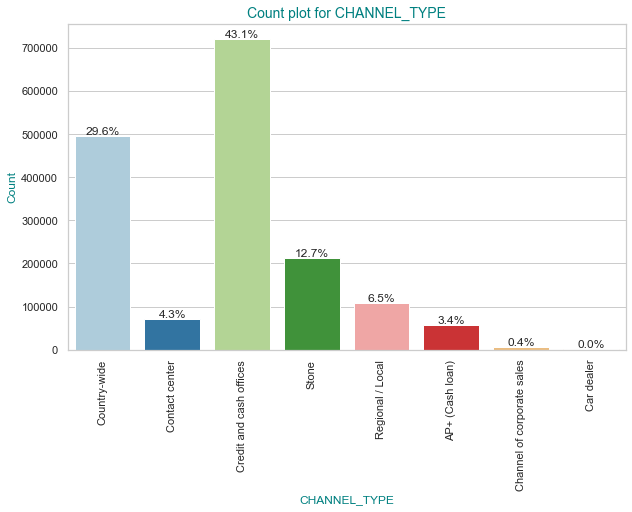

In [89]:
cat_univariate_prev('CHANNEL_TYPE', xtick_ro= 90)

Most of the clients on the previous application were acquired through 'Credit and Cash office'.

#### Univariate and Bivariate Analysis of Numeric Columns using Pairplot

<Figure size 1800x1584 with 0 Axes>

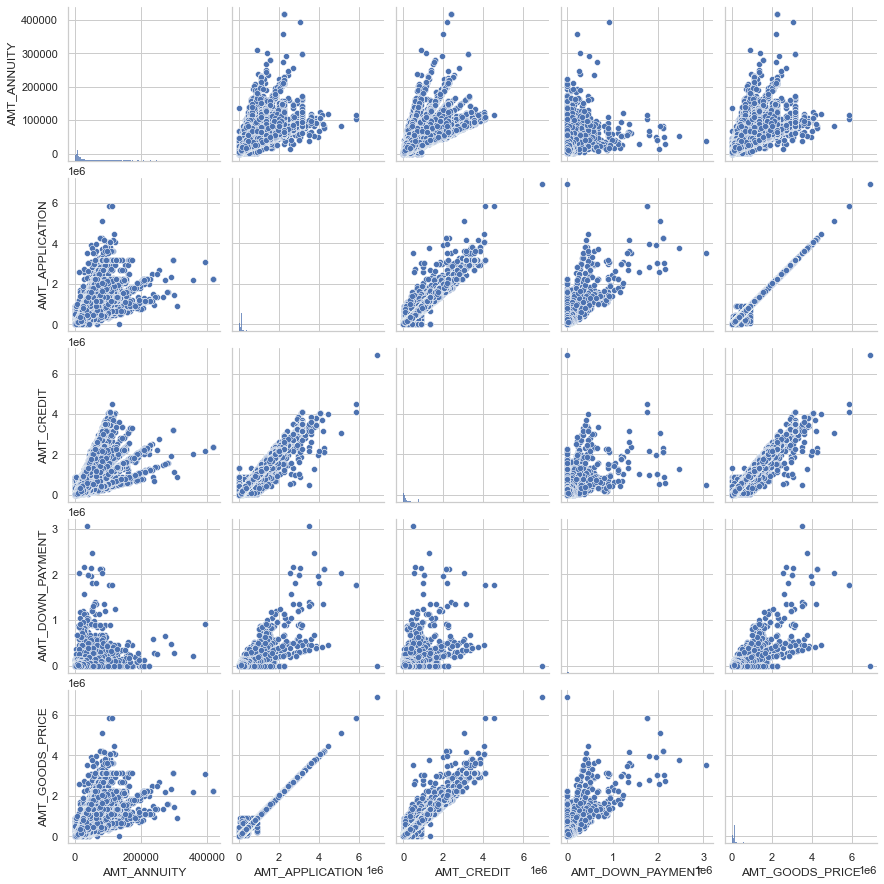

In [90]:
plt.figure(figsize= [25,22])
sns.pairplot(prev_df[['AMT_ANNUITY' ,'AMT_APPLICATION', 'AMT_CREDIT',  'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE']], dropna= True)
plt.show()

It's obvious that there will be a very strong positive linear relation between AMT_APPLICATION and AMT_GOODS_PRICE. Medium positive linear relation is there between AMT_APPLICATION and AMT_CREDIT.

### Correlation between previous data variable

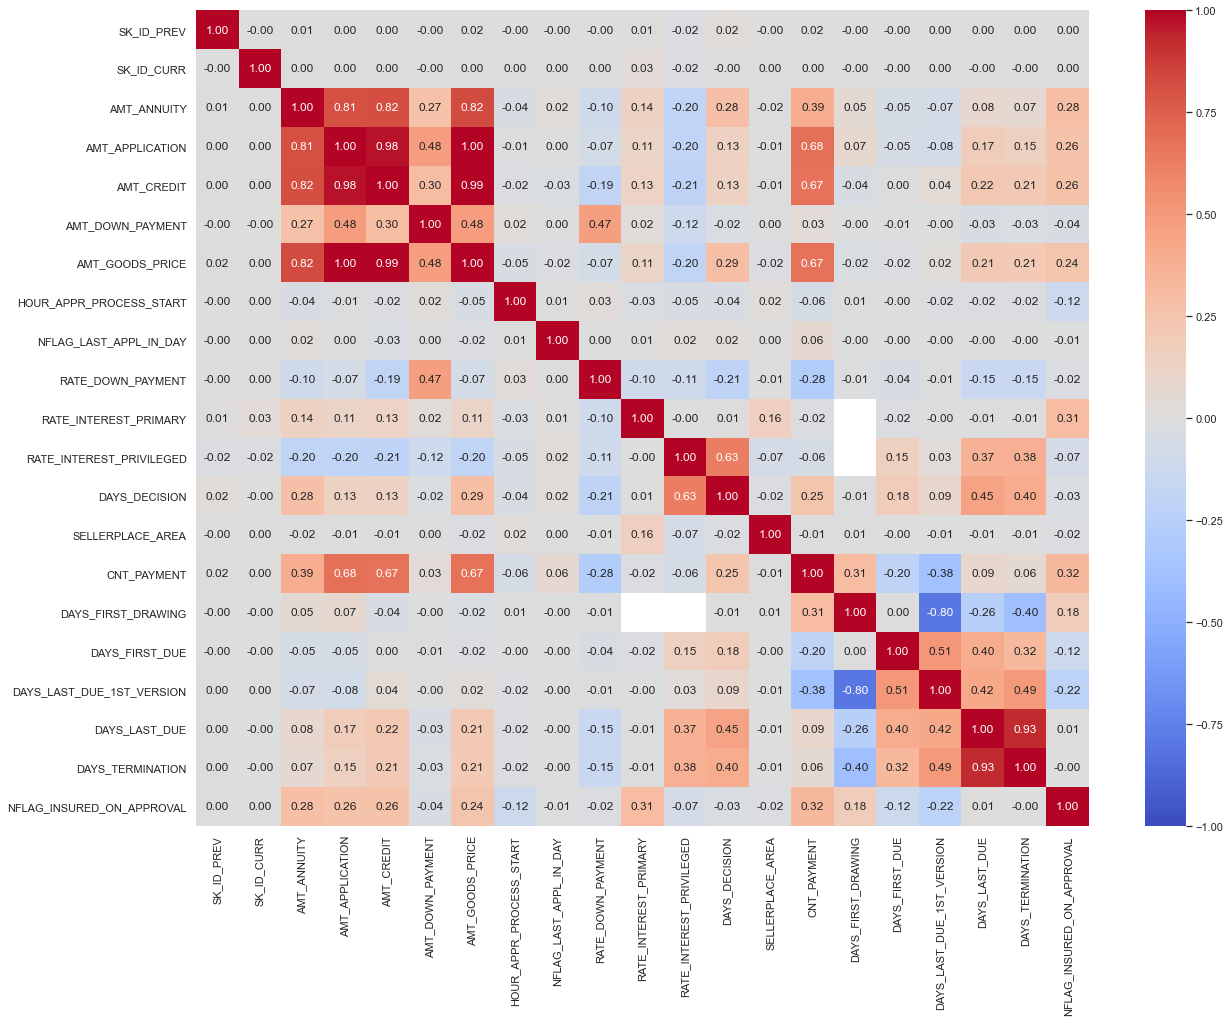

In [91]:
plt.figure(figsize= [20,15])
sns.heatmap(prev_df.corr(), annot= True, cmap = 'coolwarm', fmt= '.2f', vmin = -1, vmax = 1)
plt.show()

#### Bivariate Analysis of Categorical and Categorical Variables

In [264]:
prev_df_ap= prev_df[prev_df.NAME_CONTRACT_STATUS== 'Approved']
prev_df_ref= prev_df[prev_df.NAME_CONTRACT_STATUS== 'Refused']
prev_df_can= prev_df[prev_df.NAME_CONTRACT_STATUS== 'Canceled']
prev_df_un= prev_df[prev_df.NAME_CONTRACT_STATUS== 'Unused offer']
print(prev_df_ap.shape)
print(prev_df_ref.shape)
print(prev_df_can.shape)
print(prev_df_un.shape)

(1036781, 37)
(290678, 37)
(316319, 37)
(26436, 37)


In [312]:
def bi_var_cat_prev(col, rot= 0):
    fig= plt.figure(figsize= [12,5])
    plt.xticks(rotation= rot)
    title_t= f'{col} vs NAME_CONTRACT_STATUS'
    #fig.title(title_t, fontdict= {'fontsize': 14, 'color': 'Teal'})
    fig.suptitle( title_t, fontdict= {'fontsize': 14, 'color': 'Teal'})
    sns.countplot(data= prev_df, x= col,  hue='NAME_CONTRACT_STATUS', palette= 'Paired')

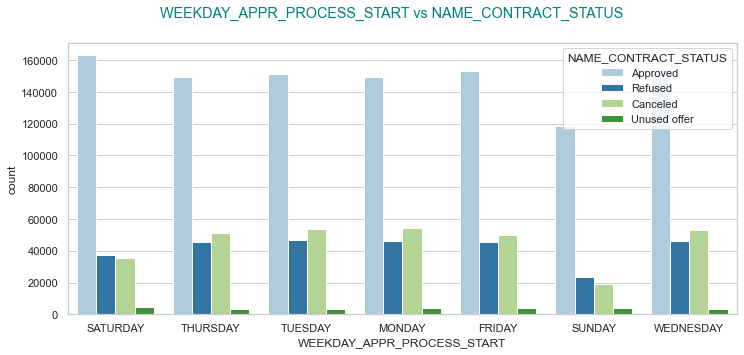

In [313]:
bi_var_cat_prev('WEEKDAY_APPR_PROCESS_START')

Loans applied on Saturday has the highest chance of getting approved.

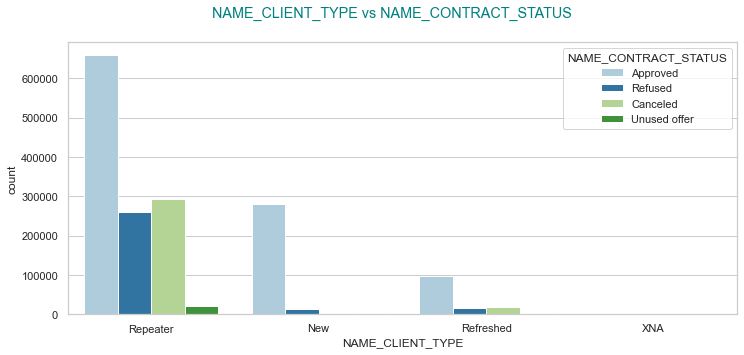

In [316]:
bi_var_cat_prev('NAME_CLIENT_TYPE')

Most of the previous applications are from Repeater clients. There are no canceled status for new clients. Most of the unused offers are from Repeater customers. Probably it's easier for the Repeater customers to get a loan approved, so few of them might have approved loans though they did not use it later.

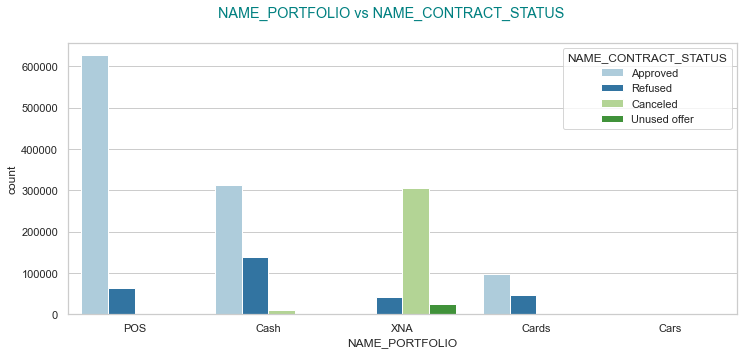

In [317]:
bi_var_cat_prev('NAME_PORTFOLIO')

For POS and CARDS there are no unused loans. Chance of a loan application of getting Refused is higher when it's Cash or Card. The loan is very unlikely to get refused if it's POS.

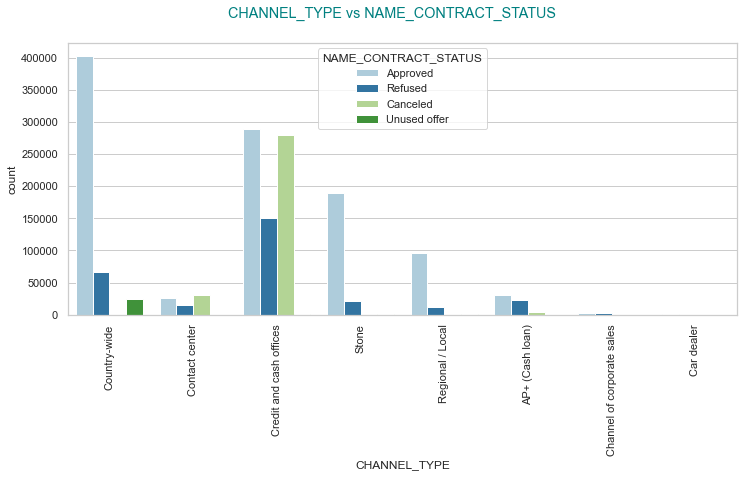

In [320]:
bi_var_cat_prev('CHANNEL_TYPE', rot= 90)

Clients acquired by bank through 'Credit and Cash offices' have highest chance of getting refused and Cancelled. The loan application most likely will not getting Cancelled if the customer is acquired through 'Country-wide' channel. 'Contact center' channel clients also have very lower chance of loan getting approved.

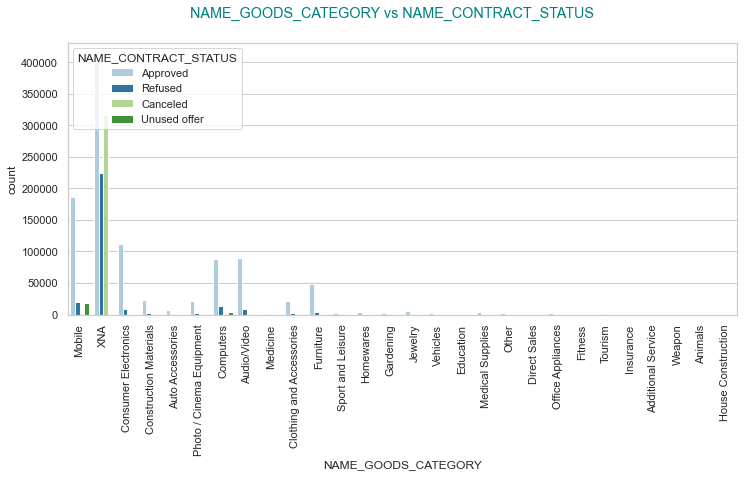

In [319]:
bi_var_cat_prev('NAME_GOODS_CATEGORY', rot= 90)

Most of loan applications belongs to Mobile goods category. There is a very high chance for the application to get approved if the application is for the good's category Mobile, Computers, Audio/Video, Furniture.

#### Bivariate Analysis of Numeric and Categorical Variables

In [315]:
cols_num= ['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','CNT_CHILDREN',
                  'HOUR_APPR_PROCESS_START_Previous','HOUR_APPR_PROCESS_START_Current',
                   'AMT_CREDIT_Current','AMT_CREDIT_Previous']

In [349]:
def num_cat_bivar_prev(col1, col2, fn_sup=14, fn_s=7, xtick_ro= 0, palette= 'Greens'):
    sns.set_style("whitegrid")
    plt.figure(figsize= [15,7])
    title_t= f'{col1} vs {col2}'
    fig = sns.catplot(data= prev_df, x= col1, y= col2, kind= 'box', col="NAME_CONTRACT_STATUS", col_wrap=2, height= 8, aspect= 1.1, palette= palette)
    fig.set_xticklabels(rotation= xtick_ro)
    plt.suptitle(title_t,  fontdict= {'fontsize': fn_sup, 'color': 'Teal'})
    fig.set_ylabels(col2, fontdict= {'fontsize': fn_s, 'color': 'Teal'})
    fig.set_xlabels(col1, fontdict= {'fontsize': fn_s, 'color': 'Teal'})

<Figure size 1080x504 with 0 Axes>

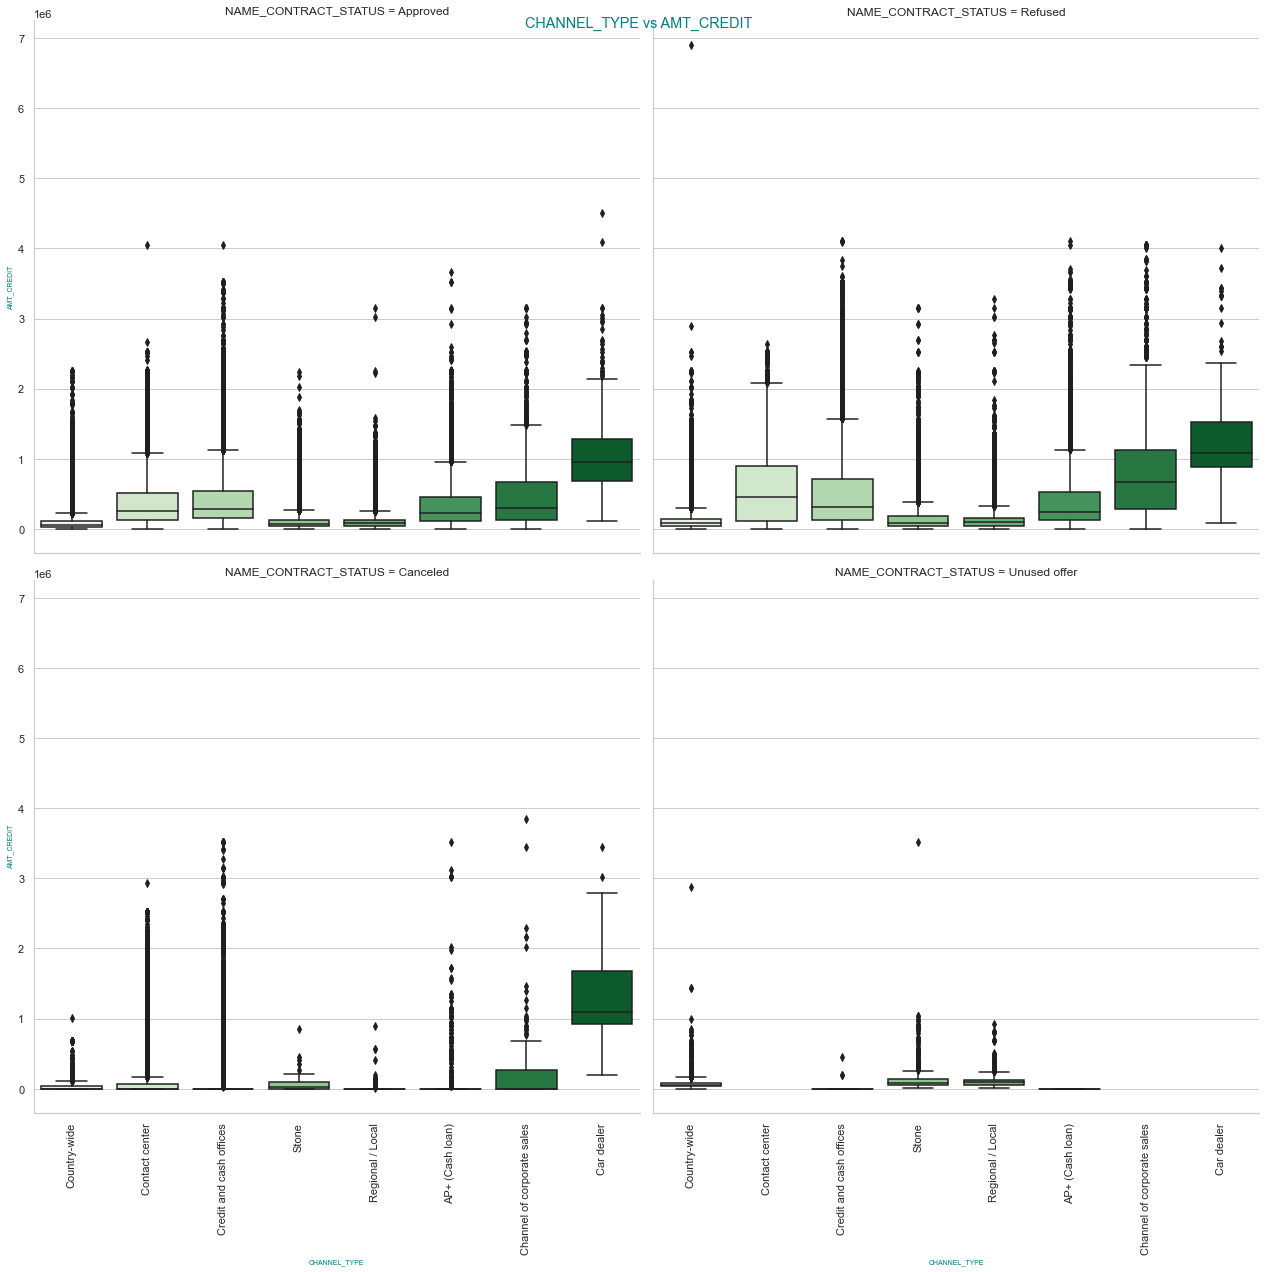

In [354]:
num_cat_bivar_prev('CHANNEL_TYPE','AMT_CREDIT', xtick_ro= 90)

<Figure size 1080x504 with 0 Axes>

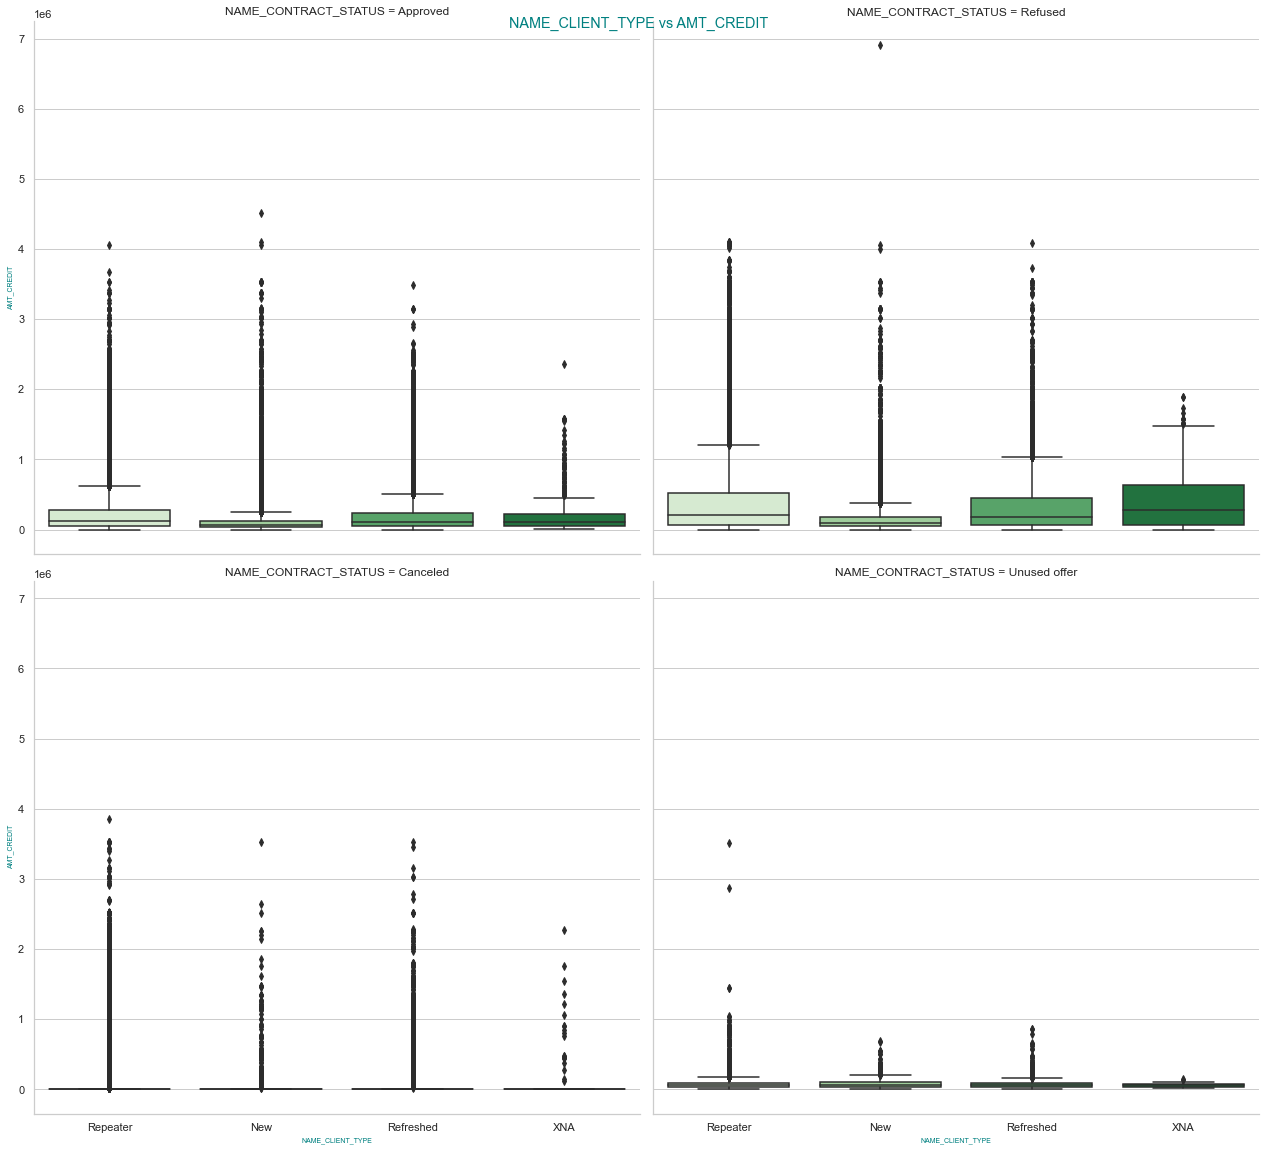

In [350]:
num_cat_bivar_prev('NAME_CLIENT_TYPE', 'AMT_CREDIT')

Median value of Credited Amount of Approved applications are lower in compare to Refused. IQR for all type of applicants for approved applications more compact than Refused application. We may say applications are getting approved if the credited amount is within a particular range.

## 6. A. Conclusion (1) – Application Data

1. In sample number of Female clients are much higher than the number of Male clients. Female clients are less likely to face payment difficulties than Male clients. Bank should consider it as a feature to predict loan defaulters.
2. Clients who have submitted Document 6 during loan application have lesser chance to have payment difficulties. Bank needs to check Document 6 during loan application. By making it a mandatory document may help to reduce defaults on loans.
3. There is a slightly higher chance of clients paying the loan in time if the client owns at least one car. Bank may gather this insight while approving a loan application.
4. Clients having "Higher Education" are more likely to repay the loans better than other education groups. Bank should consider the education as an important parameter before approving the loan.
5. Most of the clients are "Married" and they are less likely to face difficulties in loan repayment. Where Single, Window are more likely to default on the loan.  Clients living with their parents are more likely to default on a loan. Bank should consider this feature along with other features while approving a loan.
6. Peoples of age group 20-40 of Low ad Higher-Medium income groups and occupation type Laborers are most likely face payment difficulties. So, applicants matches all these criteria should be validated on other parameters before approving their applications.
7. Most of the clients are Laborers and they are facing more difficulties in repaying the loan in compare to Managers, Accountants, Core Staff, High Skill tech Staff etc. higher paying jobs. Bank should consider applicant's current job status before approving the loan application.
8. Pensioners are more likely to repay the loan in compare to other income classes. The reason could be, the pensioners have a fixed stable income, and they may take loan of a calculated amount, so that the monthly installment can be covered using the pension income.  Bank should encourage for pensioner clients as it’s comparatively profitable for the bank.







## 6. B. Conclusion (2) – Previous Application Data

1. Loans applied on Saturday has the highest chance of getting approved.

2. Most of the previous applications are from Repeater clients. There are no canceled status for new clients. Most of the unused offers are from Repeater customers. Probably it's easier for the Repeater customers to get a loan approved, so few of them might have approved loans though they did not use it later.

3. For POS and CARDS there are no unused loans. Chance of a loan application of getting Refused is higher when it's Cash or Card. The loan is very unlikely to get refused if it's POS.

4. Most of loan applications belongs to Mobile goods category. There is a very high chance for the application to get approved if the application is for the good's category Mobile, Computers, Audio/Video, Furniture.


5. Clients acquired by bank through 'Credit and Cash offices' have highest chance of getting refused and Cancelled. The loan application most likely will not getting Cancelled if the customer is acquired through 'Country-wide' channel. ‘Contact center' channel clients also have very lower chance of loan getting approved.
